<a href="https://colab.research.google.com/github/bramyeon/korea-happiness/blob/main/analysis2__Seoul_Gu_2021ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Korea Happiness:** Model-Based Analysis

Summer Institute in Computational Social Science (SICSS-Korea) 2024 Team Proeject Extension

**Author**: Kyungmin Lee (kmlee@udel.edu)

**Team Members (ABC order)**: Inkoo Kang, Ju Hee Jeung, Kyungmin Lee, Yumi Park



Date: Sep 15, 2024

This notebook shows **Gu level** analysis in **Seoul City**.


Notebook:
- This notebook included 1) data loading; 2) data preprocessing; 3) data analysis; and 4) data visualization - all in one notebook.
- The data are saved in Shared Google Drive for team project (The orignial data source information is included in the notebook).




This notebook is described following with the draft:
* **Chapter 4.1.:** Happiness Data Description (age group, sex, housing status, marriage status)
* **Chapter 4.2.:** Spatiotemporal Analysis (Seoul & Korea, 2020-2021)
* **Chapter 4.3.:** Happiness and Sustainability factors (Economic/Social/Environmental aspects) - Bar plots, correlation, regression analysis




If you find anything suspicious or wrong, please feel free to let me know via my email. Happy coding!




# Loading Data

In [ ]:
!pip install pyreadstat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gp

import pyreadstat
import zipfile

import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point

import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# - Directory to Shared Drive
ROOT_DIR = '/content/drive/Shareddrives/SICSS_2024_groupproject/2_data/'
DATA_DIR = 'data-korea'
DATA_DIR = os.path.join(ROOT_DIR, DATA_DIR)

#Data Dictionary

In [ ]:
# Dictionary for translation
translation_dict1 = {
    '강원도': 'Gangwon-do',
    '경기도': 'Gyeonggi-do',
    '경상남도': 'Gyeongsangnam-do',
    '경상북도': 'Gyeongsangbuk-do',
    '광주광역시': 'Gwangju',
    '대구광역시': 'Daegu',
    '부산광역시': 'Busan',
    '대전광역시': 'Daejeon',
    '서울특별시': 'Seoul',
    '울산광역시': 'Ulsan',
    '인천광역시': 'Incheon',
    '전라남도': 'Jeollanam-do',
    '전라북도': 'Jeollabuk-do',
    '제주특별자치도': 'Jeju',
    '제주도': 'Jeju',
    '충청남도': 'Chungcheongnam-do',
    '충청북도': 'Chungcheongbuk-do',
    '세종특별자치시': 'Sejong-si',
    '강원특별자치도': 'Gangwon-do',
    '전북특별차지도': 'Jeollabuk-do',
    None: None  # Keeping None as None
}

translation_dict2 = {
    '춘천시': 'Chuncheon',
    '원주시': 'Wonju',
    '강릉시': 'Gangneung',
    '동해시': 'Donghae',
    '태백시': 'Taebaek',
    '속초시': 'Sokcho',
    '삼척시': 'Samcheok',
    '홍천군': 'Hongcheon',
    '횡성군': 'Hoengseong',
    '영월군': 'Yeongwol',
    '평창군': 'Pyeongchang',
    '정선군': 'Jeongseon',
    '양양군': 'Yangyang',
    '화천군': 'Hwacheon',
    '고성군': 'Goseong',
    '양구군': 'Yanggu',
    '철원군': 'Cheorwon',
    '인제군': 'Inje',
    '수원시': 'Suwon',
    '성남시': 'Seongnam',
    '의정부시': 'Uijeongbu',
    '안양시': 'Anyang',
    '광명시': 'Gwangmyeong',
    '평택시': 'Pyeongtaek',
    '안산시': 'Ansan',
    '과천시': 'Gwacheon',
    '구리시': 'Guri',
    '남양주시': 'Namyangju',
    '오산시': 'Osan',
    '시흥시': 'Siheung',
    '군포시': 'Gunpo',
    '의왕시': 'Uiwang',
    '하남시': 'Hanam',
    '용인시': 'Yongin',
    '이천시': 'Icheon',
    '안성시': 'Anseong',
    '광주시': 'Gwangju',
    '여주시': 'Yeoju',
    '가평군': 'Gapyeong',
    '양평군': 'Yangpyeong',
    '부천시': 'Bucheon',
    '동두천시': 'Dongducheon',
    '고양시': 'Goyang',
    '양주시': 'Yangju',
    '포천시': 'Pocheon',
    '화성시': 'Hwaseong',
    '연천군': 'Yeoncheon',
    '김포시': 'Gimpo',
    '파주시': 'Paju',
    '창원시': 'Changwon',
    '진주시': 'Jinju',
    '통영시': 'Tongyeong',
    '사천시': 'Sacheon',
    '김해시': 'Gimhae',
    '밀양시': 'Miryang',
    '거제시': 'Geoje',
    '양산시': 'Yangsan',
    '의령군': 'Uiryeong',
    '함안군': 'Haman',
    '창녕군': 'Changnyeong',
    '남해군': 'Namhae',
    '하동군': 'Hadong',
    '산청군': 'Sancheong',
    '함양군': 'Hamyang',
    '거창군': 'Geochang',
    '합천군': 'Hapcheon',
    '포항시': 'Pohang',
    '경주시': 'Gyeongju',
    '김천시': 'Gimcheon',
    '안동시': 'Andong',
    '구미시': 'Gumi',
    '영주시': 'Yeongju',
    '영천시': 'Yeongcheon',
    '상주시': 'Sangju',
    '문경시': 'Mungyeong',
    '경산시': 'Gyeongsan',
    '의성군': 'Uiseong',
    '청송군': 'Cheongsong',
    '영양군': 'Yeongyang',
    '영덕군': 'Yeongdeok',
    '청도군': 'Cheongdo',
    '고령군': 'Goryeong',
    '성주군': 'Seongju',
    '칠곡군': 'Chilgok',
    '예천군': 'Yecheon',
    '봉화군': 'Bonghwa',
    '울진군': 'Uljin',
    '울릉군': 'Ulleung',
    '동구': 'Dong-gu',
    '서구': 'Seo-gu',
    '남구': 'Nam-gu',
    '북구': 'Buk-gu',
    '광산구': 'Gwangsan-gu',
    '중구': 'Jung-gu',
    '수성구': 'Suseong-gu',
    '달서구': 'Dalseo-gu',
    '달성군': 'Dalseong-gun',
    '군위군': 'Gunwi-gun',
    '영도구': 'Yeongdo-gu',
    '부산진구': 'Busanjin-gu',
    '동래구': 'Dongnae-gu',
    '해운대구': 'Haeundae-gu',
    '사하구': 'Saha-gu',
    '금정구': 'Geumjeong-gu',
    '강서구': 'Gangseo-gu',
    '연제구': 'Yeonje-gu',
    '수영구': 'Suyeong-gu',
    '사상구': 'Sasang-gu',
    '기장군': 'Gijang-gun',
    '유성구': 'Yuseong-gu',
    '대덕구': 'Daedeok-gu',
    '종로구': 'Jongno-gu',
    '용산구': 'Yongsan-gu',
    '성동구': 'Seongdong-gu',
    '광진구': 'Gwangjin-gu',
    '동대문구': 'Dongdaemun-gu',
    '중랑구': 'Jungnang-gu',
    '성북구': 'Seongbuk-gu',
    '강북구': 'Gangbuk-gu',
    '도봉구': 'Dobong-gu',
    '노원구': 'Nowon-gu',
    '은평구': 'Eunpyeong-gu',
    '서대문구': 'Seodaemun-gu',
    '마포구': 'Mapo-gu',
    '양천구': 'Yangcheon-gu',
    '구로구': 'Guro-gu',
    '금천구': 'Geumcheon-gu',
    '영등포구': 'Yeongdeungpo-gu',
    '동작구': 'Dongjak-gu',
    '관악구': 'Gwanak-gu',
    '서초구': 'Seocho-gu',
    '강남구': 'Gangnam-gu',
    '송파구': 'Songpa-gu',
    '강동구': 'Gangdong-gu',
    '울주군': 'Ulju-gun',
    '미추홀구': 'Michuhol-gu',
    '연수구': 'Yeonsu-gu',
    '남동구': 'Namdong-gu',
    '부평구': 'Bupyeong-gu',
    '계양구': 'Gyeyang-gu',
    '강화군': 'Ganghwa-gun',
    '옹진군': 'Ongjin-gun',
    '목포시': 'Mokpo',
    '여수시': 'Yeosu',
    '순천시': 'Suncheon',
    '나주시': 'Naju',
    '광양시': 'Gwangyang',
    '담양군': 'Damyang-gun',
    '곡성군': 'Gokseong-gun',
    '구례군': 'Gurye-gun',
    '고흥군': 'Goheung-gun',
    '보성군': 'Boseong-gun',
    '화순군': 'Hwasun-gun',
    '장흥군': 'Jangheung-gun',
    '강진군': 'Gangjin-gun',
    '해남군': 'Haenam-gun',
    '영암군': 'Yeongam-gun',
    '무안군': 'Muan-gun',
    '함평군': 'Hampyeong-gun',
    '영광군': 'Yeonggwang-gun',
    '장성군': 'Jangseong-gun',
    '완도군': 'Wando-gun',
    '진도군': 'Jindo-gun',
    '신안군': 'Sinan-gun',
    '전주시': 'Jeonju',
    '군산시': 'Gunsan',
    '익산시': 'Iksan',
    '정읍시': 'Jeongeup',
    '남원시': 'Namwon',
    '김제시': 'Gimje',
    '완주군': 'Wanju-gun',
    '진안군': 'Jinan-gun',
    '무주군': 'Muju-gun',
    '장수군': 'Jangsu-gun',
    '임실군': 'Imsil-gun',
    '순창군': 'Sunchang-gun',
    '고창군': 'Gochang-gun',
    '부안군': 'Buan-gun',
    '제주시': 'Jeju',
    '서귀포시': 'Seogwipo',
    '천안시': 'Cheonan',
    '공주시': 'Gongju',
    '보령시': 'Boryeong',
    '아산시': 'Asan',
    '서산시': 'Seosan',
    '논산시': 'Nonsan',
    '계룡시': 'Gyeryong',
    '당진시': 'Dangjin',
    '금산군': 'Geumsan-gun',
    '부여군': 'Buyeo-gun',
    '서천군': 'Seocheon-gun',
    '청양군': 'Cheongyang-gun',
    '홍성군': 'Hongseong-gun',
    '예산군': 'Yesan-gun',
    '태안군': 'Taean-gun',
    '청주시': 'Cheongju',
    '충주시': 'Chungju',
    '제천시': 'Jecheon',
    '보은군': 'Boeun-gun',
    '옥천군': 'Okcheon-gun',
    '영동군': 'Yeongdong-gun',
    '증평군': 'Jeungpyeong-gun',
    '진천군': 'Jincheon-gun',
    '괴산군': 'Goesan-gun',
    '음성군': 'Eumseong-gun',
    '단양군': 'Danyang-gun',
    '전주시 덕진구': 'Deokjin-gu, Jeonju',
    '고양시 덕양구': 'Deogyang-gu, Goyang',
    '수원시 권선구': 'Gwonseon-gu, Suwon',
    '안양시 만안구': 'Manan-gu, Anyang',
    '성남시 분당구': 'Bundang-gu, Seongnam',
    '고양시 일산서구': 'Ilsanseo-gu, Goyang',
    '창원시 마산합포구': 'Masan Happo-gu, Changwon',
    '안양시 동안구': 'Dongan-gu, Anyang',
    '천안시 동남구': 'Dongnam-gu, Cheonan',
    '수원시 영통구': 'Yeongtong-gu, Suwon',
    '고양시 일산동구': 'Ilsandong-gu, Goyang',
    '천안시 서북구': 'Seobuk-gu, Cheonan',
    '용인시 수지구': 'Suji-gu, Yongin',
    '수원시 장안구': 'Jangan-gu, Suwon',
    '용인시 처인구': 'Cheoin-gu, Yongin',
    '성남시 수정구': 'Sujeong-gu, Seongnam',
    '성남시 중원구': 'Jungwon-gu, Seongnam',
    '안산시 단원구': 'Danwon-gu, Ansan',
    '안산시 상록구': 'Sangnok-gu, Ansan',
    '창원시 의창구': 'Uichang-gu, Changwon',
    '창원시 성산구': 'Seongsan-gu, Changwon',
    '창원시 마산회원구': 'Masanhoewon-gu, Changwon',
    '용인시 기흥구': 'Giheung-gu, Yongin',
    '창원시 진해구': 'Jinhae-gu, Changwon',
    '청주시 상당구': 'Sangdang-gu, Cheongju',
    '세종시': 'Sejong-si',
    '청주시 청원구': 'Cheongwon-gu, Cheongju',
    '청주시 흥덕구': 'Heungdeok-gu, Cheongju',
    '수원시 팔달구': 'Paldal-gu, Suwon',
    '포항시 남구': 'Nam-gu, Pohang',
    '청주시 서원구': 'Seowon-gu, Cheongju',
    '포항시 북구': 'Buk-gu, Pohang',
    '전주시 완산구': 'Wansan-gu, Jeonju',
    '제주도시': 'Jeju City',
}

translation_dict3 =  {'서울': 'Seoul',
                    '부산': 'Busan',
                    '대구': 'Daegu',
                    '인천': 'Incheon',
                    '광주': 'Gwangju',
                    '대전': 'Daejeon',
                    '울산': 'Ulsan',
                    '세종': 'Sejong-si',
                    '경기': 'Gyeonggi-do',
                    '강원': 'Gangwon-do',
                    '충북': 'Chungcheongbuk-do',
                    '충남': 'Chungcheongnam-do',
                    '전북': 'Jeollabuk-do',
                    '전남': 'Jeollanam-do',
                    '경북': 'Gyeongsangbuk-do',
                    '경남': 'Gyeongsangnam-do',
                    '제주': 'Jeju'}

## Data Preprocessing - Happiness Data

In [ ]:
# Happiness 2020 Preliminary Survey data
df2020_pre, meta = pyreadstat.read_sav(os.path.join(DATA_DIR, "korea-2020-prelim/kor_data_20200086.sav"))
print(meta.column_names)
print(meta.column_labels)
print(meta.value_labels) # Check the meta data and labels

COLUMN_NAME_DEL = ['id', 'type', 'coa','wt', 'f1', 'f2', 'f2_1', 'f2_2', 'f2_3', 'f2_4', 'f2_5',
                   'sq0','sq4',
                   'sq1_1_1', 'sq1_1_2', 'sq1_1_3', 'sq1_1_4', 'sq1_1_5', 'sq1_2_1', 'sq1_2_2',
                   'sq1_2_3', 'sq1_2_4', 'sq1_2_5', 'sq1_3_1', 'sq1_3_2', 'sq1_3_3', 'sq1_3_4', 'sq1_3_5',
                   'sq1_4_1', 'sq1_4_2', 'sq1_4_3', 'sq1_4_4', 'sq1_4_5',

                   'sq1_6', 'sq1_7', 'sq1_7t', 'sq1_8', 'sq1_9', 'sq1_10',
                   'd12_1_1', 'd12_1_2', 'd12_2_1', 'd12_2_2', 'd13_1_1', 'd13_1_2', 'd13_2_1', 'd13_2_2',
                   'e1_1_1', 'e1_1_2', 'e1_2_1', 'e1_2_2', 'e2_1', 'e2_2', 'e2_3', 'e2_4', 'e2_5', 'e2_6',
                   'e2_7', 'e2_8', 'e2_9', 'e2_10', 'e3_1', 'e3_2', 'e4', 'e5',
                   'e6_7', 'e7', 'e8',
                   'dq1_1_1', 'dq1_1_2', 'dq1_1_3', 'dq1_2_1', 'dq1_2_2', 'dq1_2_3', 'dq2', 'dq3', 'dq3t',
                   'dq4', 'dq5', 'dq5t', 'dq6', 'dq7', 'dq8', 'dq9', 'dq9t', 'dq10_1', 'dq10_2', 'dq11',
                   'co10', 'co11', 'co11t', 'co12', 'co12t', 'co13_1', 'co13_2', 'co13_3', 'co13t',
                   'co15', 'co15t', 'co16_1', 'co16_2', 'co16_3', 'co16_4', 'co16_5', 'co16_6', 'co16_7',
                   'co16_8', 'co16_8t', 'co17', 'co18_1', 'co18_2', 'co18_3', 'co18_4', 'co18_5', 'co18_6',
                   'co18_7', 'co18_7t', 'co25', 'co26', 'co27', 'co28', 'co29', 'co30']

for COLUMN_NAME in COLUMN_NAME_DEL:
  del df2020_pre[COLUMN_NAME]

cols20 = df2020_pre.columns
for i in range(len(cols20)):
  if df2020_pre[cols20[i]].dtype not in [float, int]:
    print(f"{cols20[i]}")

df2020_pre.rename(columns={'sq2':'sex', 'sq3':'age_year',
                           'sq1_5_1':"housing_1.0",
                           'sq1_5_2':"housing_2.0",
                           'sq1_5_3':"housing_3.0",
                           'sq1_5_4':"housing_4.0",
                           'sq1_5_5':"housing_5.0",
                           'sq1_5':'marriage',
                           'sq1_6':'housing'}, inplace=True)

# - add age column
df2020_pre['age'] = [2020 - df2020_pre['age_year'][i] for i in range(len(df2020_pre))]
df2020_pre = df2020_pre.drop('age_year', axis=1)

# - fill na
df2020_pre = df2020_pre.fillna(0)

df2020_pre.rename(columns={"a1": "happiness_score", "c1": "happiness_ladder"}, inplace=True)

# - Changes the categorical columns into onehot vectors
df2020_pre = pd.get_dummies(df2020_pre, columns=['sex'], dtype=float)

# - Translation English
df2020_pre["Si"] = df2020_pre["sido"].map(meta.value_labels['labels1'])
df2020_pre["Gu"] = df2020_pre['gugun'].map(meta.value_labels['labels2'])

df2020_pre["Si"] = df2020_pre["Si"].map(translation_dict3)
df2020_pre["Gu"] = df2020_pre["Gu"].map(translation_dict2)
df2020_pre

# - Save the preprocessed dataset
df2020_pre.to_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"), index=False)
print(df2020_pre.shape)
#df2020_pre

['id', 'type', 'coa', 'gagu', 'sido', 'gugun', 'strataid', 'wt', 'f1', 'f2', 'f2_1', 'f2_2', 'f2_3', 'f2_4', 'f2_5', 'sq0', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'age', 'sq1_1_1', 'sq1_1_2', 'sq1_1_3', 'sq1_1_4', 'sq1_1_5', 'sq1_2_1', 'sq1_2_2', 'sq1_2_3', 'sq1_2_4', 'sq1_2_5', 'sq1_3_1', 'sq1_3_2', 'sq1_3_3', 'sq1_3_4', 'sq1_3_5', 'sq1_4_1', 'sq1_4_2', 'sq1_4_3', 'sq1_4_4', 'sq1_4_5', 'sq1_5_1', 'sq1_5_2', 'sq1_5_3', 'sq1_5_4', 'sq1_5_5', 'sq1_6', 'sq1_7', 'sq1_7t', 'sq1_8', 'sq1_9', 'sq1_10', 'a1', 'a2_1', 'a2_2', 'a2_3', 'a3_1', 'a3_2', 'a3_3', 'a3_4', 'a3_5', 'b1_1', 'b1_2', 'b1_3', 'b1_4', 'b1_5', 'b1_6', 'b1_7', 'b1_8', 'b1_9', 'b1_10', 'b2', 'b3', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7_1', 'c7_2', 'c7_3', 'c7_4', 'c7_5', 'c7_6', 'c7_7', 'c7_8', 'c7_9', 'd1_1', 'd1_2', 'd1_3', 'd1_4', 'd1_5', 'd1_6', 'd1_7', 'd1_8', 'd1_9', 'd1_10', 'd1_11', 'd2_1', 'd2_2', 'd2_3', 'd2_4', 'd2_5', 'd2_6', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd3_5', 'd3_6', 'd3_7', 'd4_1', 'd4_2', 'd4_3', 'd4_4', 'd4_5'

In [ ]:
# Happiness Survey 2020 data
df2020, meta = pyreadstat.read_sav(os.path.join(DATA_DIR, "korea-2020/kor_data_20200063.sav"))

print(meta.column_names)
print(meta.column_labels)
print(meta.value_labels)

COLUMN_NAME_DEL = ['ID',
                   'SQ3_R', 'SQ4', 'SQ4_R',
                   'A1', 'B2_1', 'B2_2', 'B5_1', 'B5_2',
                   'B8', 'B10_1', 'B10_2',
                   'D7',
                   'D9_1', 'D9_2',
                   'E2',
                   'E5', 'E6', 'E6_1', 'E7', 'E7_1', 'DQ1', 'WT']
for COLUMN_NAME in COLUMN_NAME_DEL:
  del df2020[COLUMN_NAME]
del df2020["SQ1_R"]

cols20 = df2020.columns
for i in range(len(cols20)):
  if df2020[cols20[i]].dtype not in [float, int]:
    print(f"{cols20[i]}")

# - Change column names
df2020.rename(columns={'SQ1':'sido', 'SQ2':'sex', 'SQ3':'age_year','E1':'marriage', 'E3':'housing', 'E4':'income', 'B10': 'happiness_score'}, inplace=True)

# # - add age column
# df2020['age'] = [2020 - df2020['age_year'][i] for i in range(len(df2020))]
# df2020 = df2020.drop('age_year', axis=1)

df2020 = pd.get_dummies(df2020, columns=['sex', 'marriage', 'housing'], dtype=float)

df2020["Si"] = df2020["sido"].map(meta.value_labels['labels0'])

df2020.to_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020.csv"), index=False)
print(df2020.shape)
#df2020.head()

['ID', 'SQ1', 'SQ1_R', 'SQ2', 'SQ3', 'SQ3_R', 'SQ4', 'SQ4_R', 'A1', 'A2', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A4', 'B1_1', 'B1_2', 'B2_1', 'B2_2', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B5_1', 'B5_2', 'B6_1', 'B6_2', 'B7', 'B8', 'B9', 'B10', 'B10_1', 'B10_2', 'B11_1', 'B11_2', 'C1', 'C2_1', 'C2_2', 'C2_3', 'C3_1', 'C3_2', 'C3_3', 'C4_1', 'C4_2', 'C4_3', 'C4_4', 'C5_1_1', 'C5_1_2', 'C5_2_1', 'C5_2_2', 'C6_1_1', 'C6_1_2', 'C6_1_3', 'C6_2_1', 'C6_2_2', 'C6_2_3', 'C7_1_1', 'C7_1_2', 'C7_1_3', 'C7_1_4', 'C7_2_1', 'C7_2_2', 'C7_2_3', 'C7_2_4', 'C8_1', 'C8_2', 'C8_3', 'C8_4', 'C8_5', 'C8_6', 'C9_1', 'C9_2', 'C9_3', 'C9_4', 'C9_5', 'C9_6', 'C9_7', 'C9_8', 'D1_1', 'D1_2', 'D1_3', 'D2_1', 'D2_2', 'D2_3', 'D2_4', 'D2_5', 'D2_6', 'D2_7', 'D3_1', 'D3_2', 'D3_3', 'D3_4', 'D4_1', 'D4_2', 'D5_1', 'D5_2', 'D5_3', 'D5_4', 'D5_5', 'D6_1', 'D6_2', 'D6_3', 'D6_4', 'D7', 'D8_1', 'D8_2', 'D9_1', 'D9_2', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E6_1', 'E7', 'E7_1', 'DQ1', 'WT']
['응답

In [ ]:
# Happiness 2021 Survey data
df2021, meta = pyreadstat.read_sav(os.path.join(DATA_DIR,"korea-2021/kor_data_20210003_V2.1.sav"))

print(meta.column_names)
print(meta.column_labels)
print(meta.value_labels)

# Erase categorical answers
COLUMN_NAME_DEL = ['id', 'id_coa', 'id_gagu', 'id_gaguwon', 'coa_cd','p_coa', 's_coa', 'p_gagu', 's_gagu', 't_gaguwon', 'p_gaguwon', 's_gaguwon', 'ageband', 'area', 'poststrata',
                   'wt1', 'wt2', 'wt3', 'wt123', 'p_ingu', 's_ingu', 'wt_p', 'wt_s', 'wt_p1', 'wt_s1',
                   'd5_1_16', 'd5_1_17', 'd5_1_18', 'd5_1_19', 'd5_1_20', 'd5_1_21', 'd5_1_22', 'd5_1_23', 'd5_1_24', 'd5_1_25', 'd5_1_26', 'd5_1_27', 'd5_1_28', 'd5_1_29', 'd5_1_29t',
                   'd5_1_30', 'd5_2_1', 'd5_2_2', 'd5_2_3', 'd5_2_4', 'd5_2_5', 'd5_2_6', 'd5_2_7', 'd5_2_8', 'd5_2_9', 'd5_2_10', 'd5_2_11', 'd5_2_12', 'd5_2_13', 'd5_2_14', 'd5_2_15',
                   'd5_2_16', 'd5_2_17', 'd5_2_18', 'd5_2_19', 'd5_2_20', 'd5_2_21', 'd5_2_22', 'd5_2_23', 'd5_2_24', 'd5_2_25', 'd5_2_26', 'd5_2_27', 'd5_2_28', 'd5_2_29', 'd5_2_29t',
                   'd5_2_30', 'd5_3_1', 'd5_3_2', 'd5_3_3', 'd5_3_4', 'd5_3_5', 'd5_3_6', 'd5_3_7', 'd5_3_8', 'd5_3_9', 'd5_3_10', 'd5_3_11', 'd5_3_12', 'd5_3_13', 'd5_3_14', 'd5_3_15',
                   'd5_3_16', 'd5_3_17', 'd5_3_18', 'd5_3_19', 'd5_3_20', 'd5_3_21', 'd5_3_22', 'd5_3_23', 'd5_3_24', 'd5_3_25', 'd5_3_26', 'd5_3_27', 'd5_3_28', 'd5_3_29', 'd5_3_29t', 'd5_3_30',
                   'd9_1_1', 'd9_1_2', 'd9_2_1', 'd9_2_2',
                   'd10_1_1', 'd10_1_2', 'd10_2_1', 'd10_2_2',
                   'e1_1_1', 'e1_1_2', 'e1_2_1', 'e1_2_2', 'e2_1', 'e2_2', 'e2_3', 'e3_1', 'e3_2', 'e3_3', 'e4',
                   'e5_1', 'e5_2', 'e5_3', 'e5_4', 'e5_5', 'e5_6', 'e5_7', 'e5_8', 'e5_9','e7',
                   'e8_1', 'e8_2', 'e8_3', 'e8_4', 'e8_5', 'e8_6', 'e8_7', 'e8_8', 'e8_9',
                   'dq1_1_1', 'dq1_1_2', 'dq1_1_3', 'dq1_2_1', 'dq1_2_2', 'dq1_2_3', 'dq2', 'dq2t', 'dq3', 'dq4_1', 'dq4_2', 'dq4_99', 'dq5_1', 'dq5_2', 'dq5_99', 'dq6_1', 'dq6_2', 'dq6_99', 'dq7',
                   'dq8', 'dq9', 'dq9t', 'dq10', 'dq11', 'dq11_t',
                  'dq15_1', 'dq15_2', 'dq15_3', 'dq15_4', 'dq15_5', 'dq16',
                   'dq17', 'dq18', 'dq18t', 'dq19',
                   'f1', 'f2', 'f3', 'f4', 'f5', 'method', 'duration', 's_date', 's_timeSlot', 's_time', 's_days', 'e_date', 'e_timeSlot', 'e_time', 'e_days', 'weekdays'
                   ]

for COLUMN_NAME in COLUMN_NAME_DEL:
  del df2021[COLUMN_NAME]

cols21 = df2021.columns
for i in range(len(cols21)):
  if df2021[cols21[i]].dtype not in [float, int]:
    print(f"{cols21[i]}")

del df2021["sq1_1"]
del df2021["sq1_2"]
del df2021["sq1_3"] # "sex" data is already included
del df2021["sq1_4_1"] # "age" data is already included
del df2021["sq1_4_2"] # "age" data is already included
del df2021["sq1_6"]
del df2021["sq1_7"] # 2021 data include SQ1-7 question
del df2021["sq1_9"]
del df2021["sq1_10"]
del df2021["sq1_11"]
del df2021["sq1_12"]

# - Change column names
df2021.rename(columns={'sq1_5':'marriage',
                       'sq1_8':'housing',
                       "a1_1": "happiness_score",
                       "c1": "happiness_ladder"}, inplace=True)

df2021 = pd.get_dummies(df2021, columns=['sex', 'marriage', 'housing'], dtype=float)


df2021.rename(columns={"co1":"Covid_2021"})

df2021['Si'] = df2021['sido'].replace(translation_dict1)
df2021['Gu'] = df2021['gugun'].replace(translation_dict2)

df2021["age"] = df2021["age"].astype(int)
df2021["gugun_cd"] = df2021["gugun_cd"].astype(int).astype(str)
df2021["sido_cd"] = df2021["sido_cd"].astype(int).astype(str)

df2021.to_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"), index=False)
print(df2021.shape)
#df2021

['id', 'id_coa', 'id_gagu', 'id_gaguwon', 'coa_cd', 'sido_cd', 'sido', 'gugun_cd', 'gugun', 'strata1', 'strata2', 'strata3', 'strata_cd', 'p_coa', 's_coa', 'p_gagu', 's_gagu', 't_gaguwon', 'p_gaguwon', 's_gaguwon', 'sex', 'age', 'ageband', 'area', 'poststrata', 'wt1', 'wt2', 'wt3', 'wt123', 'p_ingu', 's_ingu', 'wt_p', 'wt_s', 'wt_p1', 'wt_s1', 'sq1_1', 'sq1_2', 'sq1_3', 'sq1_4_1', 'sq1_4_2', 'sq1_5', 'sq1_6', 'sq1_7', 'sq1_8', 'sq1_9', 'sq1_10', 'sq1_11', 'sq1_12', 'a1_1', 'a2_1', 'a2_2', 'a2_3', 'a3_1', 'a3_2', 'a3_3', 'a3_4', 'a3_5', 'b1_1', 'b1_2', 'b1_3', 'b1_4', 'b1_5', 'b1_6', 'b1_7', 'b1_8', 'b1_9', 'b1_10', 'b2', 'b3', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7_1', 'c7_2', 'c7_3', 'c7_4', 'c7_5', 'c7_6', 'c7_7', 'c7_8', 'c8', 'd1_1', 'd1_2', 'd1_3', 'd1_4', 'd1_5', 'd1_6', 'd1_7', 'd1_8', 'd1_9', 'd1_10', 'd1_11', 'd1_12', 'd1_13', 'd1_14', 'd1_15', 'd1_16', 'd1_17', 'd1_18', 'd1_19', 'd1_20', 'd2_1', 'd2_2', 'd2_3', 'd2_4', 'd2_5', 'd2_6', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd3_5', 

In [ ]:
# Happiness 2022 survey data

df2022, meta = pyreadstat.read_sav(os.path.join(DATA_DIR, "korea-2022/kor_data_20220060.SAV"))

print(meta.column_names)
print(meta.column_labels)
print(meta.value_labels)

del df2022['ID']
del df2022['ID_gagu']
del df2022["SQ1_2"]
del df2022["SQ1_6"]
del df2022["SQ1_9"]
del df2022["SQ1_10"]
del df2022["SQ1_11"]
del df2022["SQ1_12"]

# Erase categorical answers
COLUMN_NAME_DEL = ['D5_1_1', 'D5_1_2', 'D5_2_1', 'D5_2_2', 'D5_3_1', 'D5_3_2',
                   'D9_1_1', 'D9_1_2', 'D9_2_1', 'D9_2_2',
                   'D10_1_1', 'D10_1_2', 'D10_2_1', 'D10_2_2',
                   'D13', 'D14',
                   'E1_1_1', 'E1_1_2', 'E1_2_1', 'E1_2_2', 'E2_1', 'E2_2', 'E2_3', 'E3_1', 'E3_2', 'E3_3', 'E4_1','E4_2', 'E4_3', 'E4_4', 'E4_5', 'E4_6', 'E4_7', 'E4_8', 'E4_9',
                   'E6_1', 'E6_2', 'E6_3', 'E6_4', 'E6_5', 'E6_6', 'E6_7', 'E6_8', 'E6_9',
                   'DQ1_1_1', 'DQ1_1_2', 'DQ1_1_3', 'DQ1_2_1', 'DQ1_2_2', 'DQ1_2_3', 'DQ2', 'DQ3', 'DQ4_1', 'DQ4_2', 'DQ4_9998', 'DQ5_1', 'DQ5_2', 'DQ5_9998', 'DQ6_1', 'DQ6_2',
                   'DQ6_9998', 'DQ7', 'DQ8', 'DQ9', 'DQ10', 'DQ11', 'DQ12_2', 'DQ13', 'DQ14', 'DQ15_1', 'DQ15_2', 'DQ15_3', 'DQ15_4', 'DQ15_5', 'DQ16', 'DQ17', 'DQ18_1',
                   'DQ18_2', 'DQ18_3', 'DQ18_4', 'DQ18_5', 'DQ18_6', 'DQ18_7', 'DQ18_8', 'DQ18_9', 'DQ18_10', 'DQ18_11', 'DQ18_12', 'DQ18_13', 'DQ19', 'DQ20_1',
                   'TSQ1_3', 'TSQ1_4', 'TSIDO_CD', 'TDQ1', 'TC8_1', 'TDQ7', 'TDQ8', 'TDQ14_1', 'TDQ12_1', 'TSQ1_5', 'TGAGUWON', 'TSQ1_8', 'TSQ1_9', 'TSQ1_10', 'TSQ1_11', 'TDQ12_2',
                   'wt_p1', 'wt_s1', 'wt_s2']
for COLUMN_NAME in COLUMN_NAME_DEL:
  del df2022[COLUMN_NAME]


# Change column names
df2022 = df2022.rename(columns={'SQ1_3':'sex', 'SQ1_4':'age', 'SQ1_5':'marriage', 'SQ1_8':'housing', 'DQ12_1':'income'})

# - Changes the categorical columns into onehot vectors
df2022 = pd.get_dummies(df2022, columns=['sex', 'marriage', 'housing'], dtype=float)

df2022.rename(columns={"A1": "happiness_score", "C1": "happiness_ladder"}, inplace=True)

# - Save the preprocessed dataset
df2022.to_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2022.csv"), index=False)
print(df2022.shape)

['ID', 'ID_gagu', 'SQ1_2', 'SQ1_3', 'SQ1_4', 'SQ1_5', 'SQ1_6', 'SQ1_8', 'SQ1_9', 'SQ1_10', 'SQ1_11', 'SQ1_12', 'A1', 'A2_1', 'A2_2', 'A2_3', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5', 'B1_1', 'B1_2', 'B1_3', 'B1_4', 'B1_5', 'B1_6', 'B1_7', 'B1_8', 'B1_9', 'B1_10', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7', 'C7_8', 'C8', 'D1_1', 'D1_2', 'D1_3', 'D1_4', 'D1_5', 'D1_6', 'D1_7', 'D1_8', 'D1_9', 'D1_10', 'D1_11', 'D1_12', 'D1_13', 'D1_14', 'D1_15', 'D1_16', 'D1_17', 'D1_18', 'D1_19', 'D1_20', 'D2_1', 'D2_2', 'D2_3', 'D2_4', 'D2_5', 'D2_6', 'D3_1', 'D3_2', 'D3_3', 'D3_4', 'D3_5', 'D3_6', 'D3_7', 'D3_8', 'D3_9', 'D3_10', 'D3_11', 'D4_1', 'D4_2', 'D4_3', 'D5_1_1', 'D5_1_2', 'D5_2_1', 'D5_2_2', 'D5_3_1', 'D5_3_2', 'D6', 'D7', 'D8_1', 'D8_2', 'D8_3', 'D8_4', 'D8_5', 'D8_6', 'D8_7', 'D8_8', 'D8_9', 'D8_10', 'D8_11', 'D9_1_1', 'D9_1_2', 'D9_2_1', 'D9_2_2', 'D10_1_1', 'D10_1_2', 'D10_2_1', 'D10_2_2', 'D11', 'D12_1', 'D12_2', 'D12_3', 'D12_4'

In [ ]:
# Happiness 2023 survey data
df2023, meta = pyreadstat.read_sav(os.path.join(DATA_DIR, "korea-2023/kor_data_20230039.sav"))

print(meta.column_names)
print(meta.column_labels)
print(meta.value_labels)

del df2023['ID']
del df2023['ID_gagu']
del df2023["id_coa"]
del df2023["coa_cd"]
del df2023["SQ1_1"]
del df2023["SQ1_2"]
del df2023["SQ1_4"]
del df2023["SQ1_6"]
#del df2023["SQ1_7"]
del df2023["SQ1_9"]
del df2023["SQ1_10"]
del df2023["SQ1_11"]
del df2023["SQ1_12"]
del df2023["SQ1_13"]

# Erase categorical answers
COLUMN_NAME_DEL = ['D5_1_1', 'D5_1_2', 'D5_2_1', 'D5_2_2', 'D5_3_1', 'D5_3_2',
                   'D9_1_1', 'D9_1_2', 'D9_2_1', 'D9_2_2',
                   'D10_1_1', 'D10_1_2', 'D10_2_1', 'D10_2_2',
                   'D14', 'D15',
                   'E1_1_1', 'E1_1_2', 'E1_2_1', 'E1_2_2', 'E2_1', 'E2_2', 'E3_1', 'E3_2', 'E5_1',
                   'F1_1_1', 'F1_1_2', 'F1_2_1', 'F1_2_2', 'F2_1',
                   'F3_1', 'F3_2', 'F3_3', 'F3_4', 'F3_5', 'F3_6', 'F3_7', 'F3_8', 'F3_9',
                   'F5_1', 'F6_1', 'F6_2', 'F6_3', 'F6_4', 'F6_5', 'F6_6', 'F6_7', 'F6_8', 'F6_9',
                   'G3', 'G4', 'G5_1', 'G5_1_1', 'G5_1_2', 'G5_1_3', 'G5_2', 'G6', 'G7', 'G9', 'G9_1', 'G9_2_1', 'G9_2_2',
                   'G10', 'G10_1', 'G10_2_1', 'G10_2_2', 'G11', 'G11_1', 'G11_2', 'G11_3',
                   'M1', 'M2', 'M3', 'M4_1', 'M4_2', 'M5', 'M6', 'M7',
                    'DQ1_1_1', 'DQ1_1_2', 'DQ1_1_3', 'DQ1_2_1', 'DQ1_2_2', 'DQ1_2_3', 'DQ2', 'DQ3',
                   'DQ4_1', 'DQ4_2', 'DQ4_9998', 'DQ5_1', 'DQ5_2', 'DQ5_9998', 'DQ6_1', 'DQ6_2', 'DQ6_9998', 'DQ7', 'DQ8', 'DQ9', 'DQ10','DQ10_9999', 'DQ11', 'DQ11_9999',
                   'DQ12_2', 'DQ13', 'DQ14', 'DQ15', 'DQ16', 'DQ17',
                   'TSQ1_3', 'TSQ1_4', 'TSIDO_CD', 'TDQ1', 'TC6', 'TDQ7', 'TDQ8', 'TG1', 'TDQ12_1', 'TSQ1_5', 'TGAGUWON', 'TGAGUWON_G', 'TSQ1_8', 'TSQ1_9', 'TSQ1_10',
                   'TSQ1_11', 'TDQ12_2', 'f1', 'f2', 'f3', 'f4', 'f5', 'date_1', 'date_2', 'weekday_n', 'duration', 'wt_s2']

df2023 = df2023.rename(columns={'SQ1_3':'sex', 'AGE':'age', 'SQ1_5':'marriage', 'SQ1_8':'housing', 'DQ12_1':'income'})

df2023 = pd.get_dummies(df2023, columns=['sex', 'marriage', 'housing'], dtype=float)

df2023.rename(columns={"A1": "happiness_score", "C1": "happiness_ladder"}, inplace=True)

df2023.to_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2023.csv"), index=False)
print(df2023.shape)

['ID', 'ID_gagu', 'id_coa', 'coa_cd', 'SQ1_1', 'SQ1_2', 'SQ1_3', 'SQ1_4', 'AGE', 'SQ1_5', 'SQ1_6', 'SQ1_8', 'SQ1_9', 'SQ1_10', 'SQ1_11', 'SQ1_12', 'SQ1_13', 'A1', 'A2_1', 'A2_2', 'A2_3', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5', 'B1_1', 'B1_2', 'B1_3', 'B1_4', 'B1_5', 'B1_6', 'B1_7', 'B1_8', 'B1_9', 'B1_10', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5_1', 'C5_2', 'C5_3', 'C5_4', 'C5_5', 'C5_6', 'C5_7', 'C5_8', 'C6', 'D1_1', 'D1_2', 'D1_3', 'D1_4', 'D1_5', 'D1_6', 'D1_7', 'D1_8', 'D1_9', 'D1_10', 'D1_11', 'D1_12', 'D1_13', 'D1_14', 'D1_15', 'D1_16', 'D1_17', 'D1_18', 'D1_19', 'D1_20', 'D1_21', 'D1_22', 'D1_23', 'D1_24', 'D1_25', 'D1_26', 'D1_27', 'D1_28', 'D1_29', 'D2_1', 'D2_2', 'D2_3', 'D2_4', 'D2_5', 'D2_6', 'D3_1', 'D3_2', 'D3_3', 'D3_4', 'D3_5', 'D3_6', 'D3_7', 'D3_8', 'D3_9', 'D3_10', 'D3_11', 'D4_1', 'D4_2', 'D4_3', 'D5_1_1', 'D5_1_2', 'D5_2_1', 'D5_2_2', 'D5_3_1', 'D5_3_2', 'D6', 'D7', 'D8_1', 'D8_2', 'D8_3', 'D8_4', 'D8_5', 'D8_6', 'D8_7', 'D8_8', 'D8_9', 'D8_10', 'D8_11', 'D9_1_1', 

# Chapter 4.1. Happiness Data Description

In [ ]:
## LOAD HAPPINESS SURVEY DATA
df2020_n = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020.csv"))
df2020 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"))
df2021 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"))
df2022 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2022.csv"))
df2023 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2023.csv"))

## Age Group

In [ ]:
def create_age_group_mean(df, year):
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    grouped = df.groupby('age_group')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
bins = list(range(10, 110, 10))
labels = [f'{i}-{i+9}' for i in range(10, 100, 10)]

grouped_2020 = create_age_group_mean(df2020, 2020)
grouped_2021 = create_age_group_mean(df2021, 2021)
grouped_2022 = create_age_group_mean(df2022, 2022)
grouped_2023 = create_age_group_mean(df2023, 2023)

combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023])

<ipython-input-229-6f1717549b3c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_group')['happiness_score'].mean().reset_index()
<ipython-input-229-6f1717549b3c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_group')['happiness_score'].mean().reset_index()
<ipython-input-229-6f1717549b3c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_grou

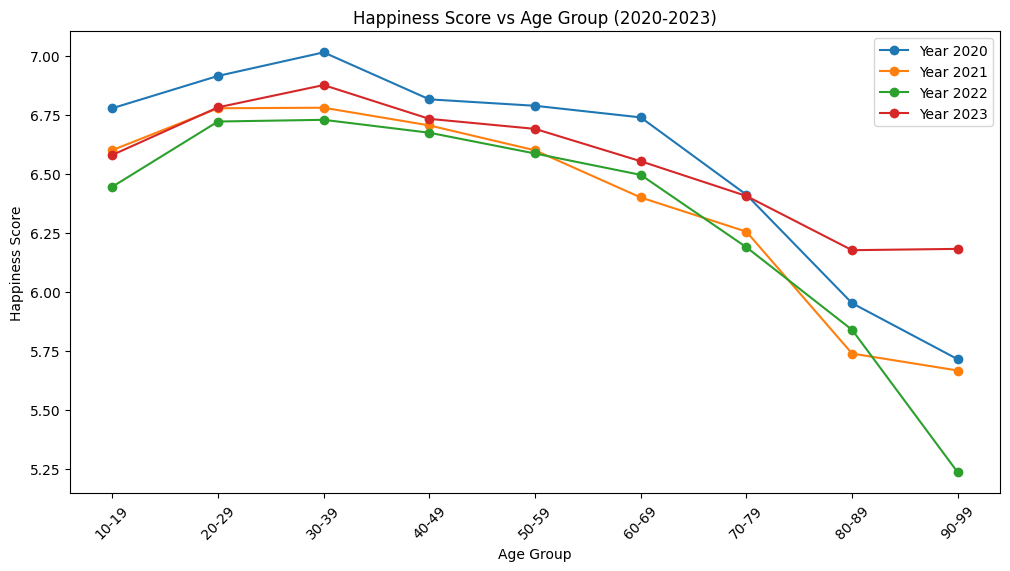

In [ ]:
# Plot
plt.figure(figsize=(12, 6))

for year in [2020, 2021, 2022, 2023]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['age_group'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Age Group')
plt.title('Happiness Score vs Age Group (2020-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Sex (Male/Female)

In [ ]:
## RELOAD HAPPINESS SURVEY DATA
df2020_n = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020.csv"))
df2020 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"))
df2021 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"))
df2022 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2022.csv"))
df2023 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2023.csv"))

In [ ]:
# Convert one-hot encoding back to a single column for each year
def convert_sex_column(df):
    df['sex'] = df.apply(lambda row: 'Male' if row['sex_1.0'] == 1 else 'Female', axis=1)
    return df

In [ ]:
# Function to group by 'sex' and calculate mean happiness score
def create_sex_group_mean(df, year):
    grouped = df.groupby('sex')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
df2020 = convert_sex_column(df2020)
df2021 = convert_sex_column(df2021)
df2022 = convert_sex_column(df2022)
df2023 = convert_sex_column(df2023)

grouped_2020 = create_sex_group_mean(df2020, 2020)
grouped_2021 = create_sex_group_mean(df2021, 2021)
grouped_2022 = create_sex_group_mean(df2022, 2022)
grouped_2023 = create_sex_group_mean(df2023, 2023)

combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023])

average_scores = combined.groupby('year')['happiness_score'].mean().reset_index()
average_scores['sex'] = 'Overall'

combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023, average_scores])

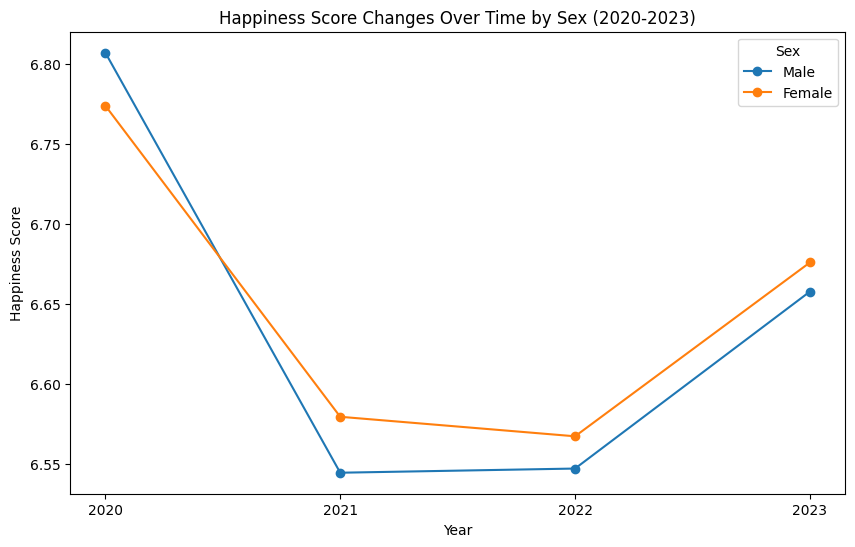

In [ ]:
plt.figure(figsize=(10, 6))

for sex in ['Male', 'Female']:
    subset = combined[combined['sex'] == sex]
    plt.plot(subset['year'].astype(str), subset['happiness_score'], marker='o', label=f'{sex}')

plt.ylabel('Happiness Score')
plt.xlabel('Year')
plt.title('Happiness Score Changes Over Time by Sex (2020-2023)')
plt.legend(title='Sex', loc="upper right")
plt.show()

## Housing Status

In [ ]:
# Convert one-hot encoding
def convert_housing_column(df):
    df['housing'] = df.apply(lambda row: 'Own house' if row['housing_1.0'] == 1 else
                                         'Lease (No monthly rent)' if row['housing_2.0'] == 1 else
                                         'Monthly rent with deposit' if row['housing_3.0'] == 1 else
                                         'Monthly rent without deposit' if row['housing_4.0'] == 1 else
                                         'Monthly lease' if row['housing_5.0'] == 1 else
                                         'Free (Company housing, official residence, etc.)' if row['housing_6.0'] == 1 else
                                         'Other', axis=1)
    return df

In [ ]:
def create_housing_group_mean(df, year):
    grouped = df.groupby('housing')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

In [ ]:
f2020_n = convert_housing_column(df2020_n)
df2021 = convert_housing_column(df2021)
df2022 = convert_housing_column(df2022)
#df2023 = convert_housing_column(df2023)

grouped_2020_n = create_housing_group_mean(df2020_n, 2020)
grouped_2021 = create_housing_group_mean(df2021, 2021)
grouped_2022 = create_housing_group_mean(df2022, 2022)
#grouped_2023 = create_housing_group_mean(df2023, 2023)

combined = pd.concat([grouped_2020, grouped_2021, grouped_2022, grouped_2023])

combined = combined[combined['housing'] != 'Other']

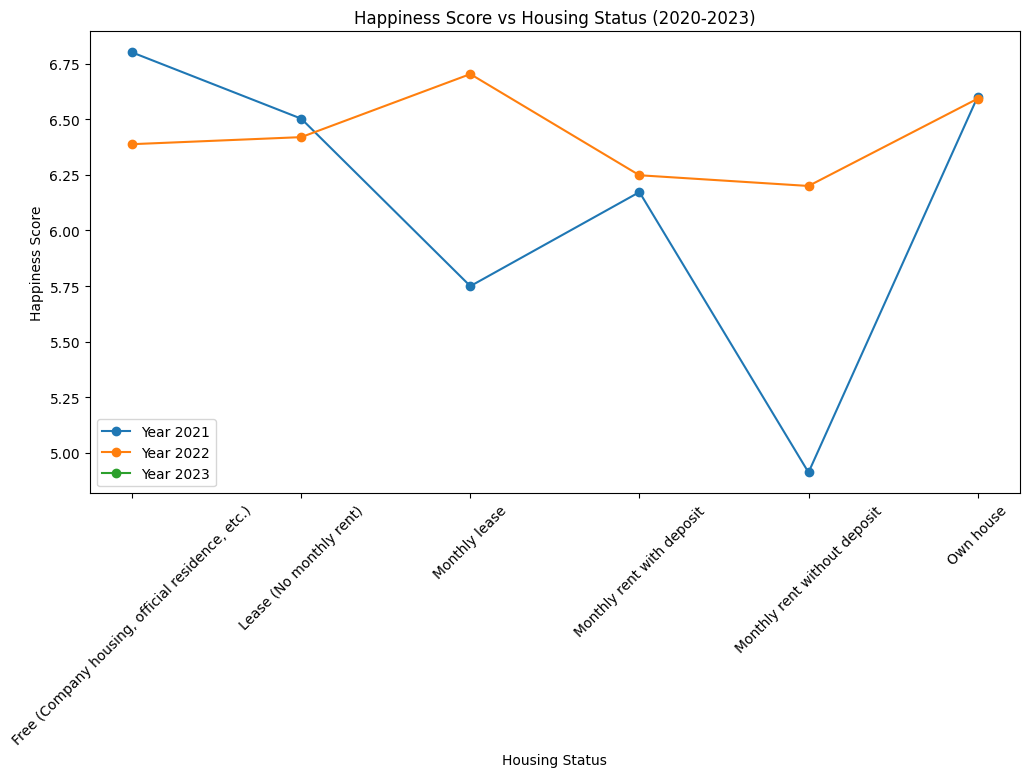

In [ ]:
plt.figure(figsize=(12, 6))

for year in [2021, 2022,2023]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['housing'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Housing Status')
plt.title('Happiness Score vs Housing Status (2020-2023)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

## Marriage Status

In [ ]:
# Convert one-hot encoding
def convert_marriage_column(df):
    df['marriage'] = df.apply(lambda row: 'Single' if row['marriage_1.0'] == 1 else
                                         'Married' if row['marriage_2.0'] == 1 else
                                         'Widowed' if row['marriage_3.0'] == 1 else
                                         'Divorced' if row['marriage_4.0'] == 1 else
                                         'Separated' if row['marriage_5.0'] == 1 else
                                         'Other', axis=1)
    return df

In [ ]:
# Function
def create_marriage_group_mean(df, year):
    grouped = df.groupby('marriage')['happiness_score'].mean().reset_index()
    grouped['year'] = year
    return grouped

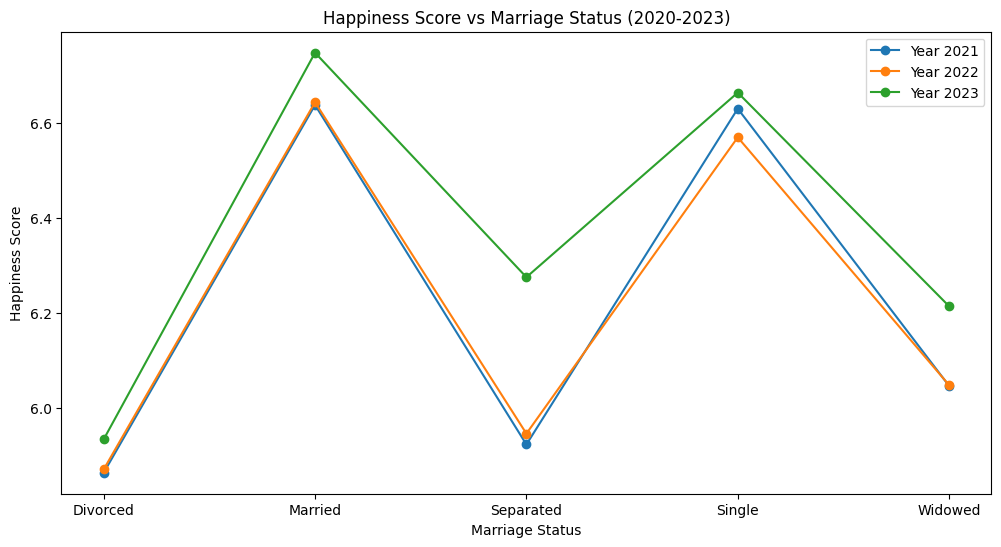

In [ ]:
#df2020 = convert_marriage_column(df2020_n)
df2021 = convert_marriage_column(df2021)
df2022 = convert_marriage_column(df2022)
df2023 = convert_marriage_column(df2023)

#grouped_2020 = create_marriage_group_mean(df2020_n, 2020)
grouped_2021 = create_marriage_group_mean(df2021, 2021)
grouped_2022 = create_marriage_group_mean(df2022, 2022)
grouped_2023 = create_marriage_group_mean(df2023, 2023)

combined = pd.concat([grouped_2021, grouped_2022, grouped_2023])

plt.figure(figsize=(12, 6))

for year in [2021, 2022, 2023]:
    subset = combined[combined['year'] == year]
    plt.plot(subset['marriage'], subset['happiness_score'], marker='o', label=f'Year {year}')

plt.ylabel('Happiness Score')
plt.xlabel('Marriage Status')
plt.title('Happiness Score vs Marriage Status (2020-2023)')
plt.legend()
plt.show()


#Chapter 4.2. Spatiotemporal Analysis (Map)

##Plotting Seoul

In [ ]:
# - Load map geoshape file
map = gp.read_file(os.path.join(DATA_DIR, "clean/korea-map-eng.shp"))
map.columns
map = map[['COL_ADM_SE', 'SGG_NM_si','SGG_NM_gug', 'COL_ADM__1', 'COL_ADM__2', 'geometry']]
map.rename(columns={'COL_ADM_SE':'Gu_Code',
                    'SGG_NM_si':'Si',
                    'SGG_NM_gug':'Gu',
                    'COL_ADM__1':'Si_Code',
                    'COL_ADM__2':'Gu_Code'},inplace=True)

In [ ]:
# - Load happiness 2020 and 2021 data
df20 = df2020_pre[["sido","gugun","Si","Gu","happiness_score","happiness_ladder","co1"]]
df20.rename(columns={"happiness_score":"Happiness_2020",
                    "happiness_ladder":"CantrilLadder_2020",
                    "co1":"COVID_2020"},inplace=True)

df21 = df2021[["sido_cd","gugun_cd","sido","gugun","Si","Gu","happiness_score","happiness_ladder","co1"]]
df21.rename(columns={"sido_cd":"Si_Code",
                     "gugun_cd":"Gu_Code",
                     "happiness_score":"Happiness_2021",
                    "happiness_ladder":"CantrilLadder_2021",
                    "co1":"COVID_2021"},inplace=True)

<ipython-input-245-5184bcd16479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20.rename(columns={"happiness_score":"Happiness_2020",
<ipython-input-245-5184bcd16479>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21.rename(columns={"sido_cd":"Si_Code",


In [ ]:
# - Make dictionary for Gu based official name and code 행정시표준코드
df = df2021.copy()
df = df[["sido","sido_cd","gugun","gugun_cd"]]

unique_pairs = df[['sido', 'sido_cd']].drop_duplicates()
korea_si_code = dict(zip(unique_pairs['sido'], unique_pairs['sido_cd']))
print(korea_si_code)

unique_pairs = df[['sido_cd', 'sido']].drop_duplicates()
korea_code_si = dict(zip(unique_pairs['sido_cd'], unique_pairs['sido']))
print(korea_code_si)

unique_pairs = df[['gugun', 'gugun_cd']].drop_duplicates()
korea_gu_code = dict(zip(unique_pairs['gugun'], unique_pairs['gugun_cd']))
print(korea_gu_code)

unique_pairs = df[['gugun_cd', 'gugun']].drop_duplicates()
korea_code_gu = dict(zip(unique_pairs['gugun_cd'], unique_pairs['gugun']))
print(korea_code_gu)

{'대전광역시': 25, '서울특별시': 11, '경기도': 31, '전라북도': 35, '충청남도': 34, '강원도': 32, '울산광역시': 26, '부산광역시': 21, '전라남도': 36, '인천광역시': 23, '경상남도': 38, '제주특별자치도': 39, '대구광역시': 22, '충청북도': 33, '경상북도': 37, '광주광역시': 24, '세종특별자치시': 29}
{25: '대전광역시', 11: '서울특별시', 31: '경기도', 35: '전라북도', 34: '충청남도', 32: '강원도', 26: '울산광역시', 21: '부산광역시', 36: '전라남도', 23: '인천광역시', 38: '경상남도', 39: '제주특별자치도', 22: '대구광역시', 33: '충청북도', 37: '경상북도', 24: '광주광역시', 29: '세종특별자치시'}
{'서구': 22030, '구로구': 11170, '강남구': 11230, '광주시': 31250, '전주시 덕진구': 35012, '관악구': 11210, '논산시': 34060, '동작구': 11200, '서대문구': 11130, '원주시': 32020, '동대문구': 11060, '고양시 덕양구': 31101, '북구': 24040, '수원시 권선구': 31012, '군포시': 31160, '안양시 만안구': 31041, '울주군': 26310, '영도구': 21040, '노원구': 11110, '용산구': 11030, '금정구': 21110, '연제구': 21130, '의정부시': 31030, '장성군': 36450, '남구': 24030, '광진구': 11050, '영등포구': 11190, '부천시': 31050, '연수구': 23040, '남양주시': 31130, '성남시 분당구': 31023, '목포시': 36010, '안성시': 31220, '송파구': 11240, '수영구': 21140, '강릉시': 32030, '해운대구': 21090, '부산진구': 21050, '고양시 일산서구':

In [ ]:
def subset_ses(loc):
  df20_sub = df20[df20["Si"] == loc]
  df21_sub = df21[df21["Si"] == loc]

  merged_df = pd.merge(df20_sub, df21_sub,on=["Gu","Gu"],how="inner")
  #merged_df

  merged_df.drop(["sido_x","gugun_x","Si_y","sido_y","gugun_y"],axis=1,inplace=True)
  merged_df.rename(columns={"Si_x":"Si"},inplace=True)
  merged_df["Gu_Code"] = merged_df["Gu"].map(korea_gu_code)

  return merged_df

In [ ]:
def subset_ses(loc):
  df20_sub = df20[df20["Si"] == loc]
  df21_sub = df21[df21["Si"] == loc]

  merged_df = pd.merge(df20_sub, df21_sub,on=["Gu","Gu"],how="inner")
  merged_df = merged_df[["Gu_Code","Si_x","Gu","Happiness_2020","CantrilLadder_2020","COVID_2020","Happiness_2021","CantrilLadder_2021","COVID_2021"]]
  merged_df.rename(columns={"Si_x":"Si"},inplace=True)

  return merged_df

In [ ]:
def year_preprocess(year):
  merged_2020 = merged_df[["Gu_Code","Si","Gu","Happiness_2020","CantrilLadder_2020","COVID_2020"]]
  merged_2020.rename(columns={
                            "Happiness_2020":"Happiness",
                            "CantrilLadder_2020":"CantrilLadder",
                            "COVID_2020":"COVID"},inplace=True)
  merged_2020["year"] = 2020

  merged_2021 = merged_df[["Gu_Code","Si","Gu","Happiness_2021","CantrilLadder_2021","COVID_2021"]]
  merged_2021.rename(columns={
                            "Happiness_2021":"Happiness",
                            "CantrilLadder_2021":"CantrilLadder",
                            "COVID_2021":"COVID"},inplace=True)
  merged_2021["year"] = 2021

  merged_df = pd.concat([merged_2020,merged_2021],axis=0)
  return merged_df

In [ ]:
def subset_map(loc):
  return map[map["Si"] == loc]

In [ ]:
loc_list = df20["Si"].unique()

df_list = []
for i in range(len(loc_list)):
  df = subset_ses(loc_list[i])
  df_list.append(df)
ses = pd.concat(df_list)

In [ ]:
ses["Si_Code"] = ses["Gu_Code"].astype(str).str[:2].astype(str)

gu_dictionary = dict(zip(ses["Gu_Code"], ses["Gu"]))
si_dictionary  = dict(zip(ses["Si_Code"], ses["Si"]))

In [ ]:
ses_gu = ses.drop(['Si','Gu','Si_Code'],axis=1).groupby("Gu_Code").mean().reset_index()

ses_gu["Gu"] = ses_gu["Gu_Code"].map(gu_dictionary)
ses_gu["Si_Code"] = ses_gu["Gu_Code"].astype(str).str[:2].astype(str)
ses_gu["Si"] = ses_gu["Si_Code"].map(si_dictionary)
ses_gu.rename(columns={"Gu_Code":"Gu_CODE"},inplace=True)

In [ ]:
def make_map(loc):
  map_sub = map[map["Si"]==loc]
  ses_sub = ses_gu[ses_gu["Si"]==loc]

  map_ses = map_sub.merge(ses_sub, left_on="Gu", right_on="Gu", how="inner")
  map_ses = map_ses[["Gu_Code","Si_x","Gu","Happiness_2020","CantrilLadder_2020",	"COVID_2020",	"Happiness_2021",	"CantrilLadder_2021",	"COVID_2021","geometry"]]
  map_ses.rename(columns={"Si_x":"Si","Gu_x":"Gu"},inplace=True)
  return map_ses

In [ ]:
def mapping_figure(map_ses, column_name, title_name):
  fig, ax = plt.subplots(1, 1, figsize=(10, 8))
  map_ses.plot(
      column=column_name,
      cmap="OrRd",
      missing_kwds={'color': 'grey', 'label': 'No Data'},
      ax=ax,
  )

  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.1)

  cbar = plt.colorbar(ax.collections[0], cax=cax)
  cbar.set_label(title_name)

  ax.set_xticks([])
  ax.set_yticks([])

  ax.set_xlabel('')
  ax.set_ylabel('')

  return plt.show()

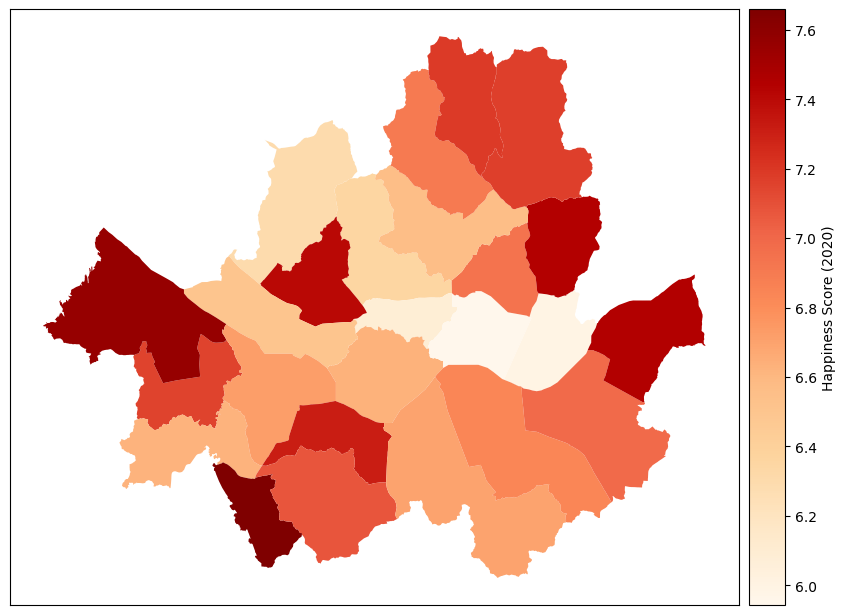

In [ ]:
map_ses = make_map("Seoul")
mapping_figure(map_ses, "Happiness_2020","Happiness Score (2020)")

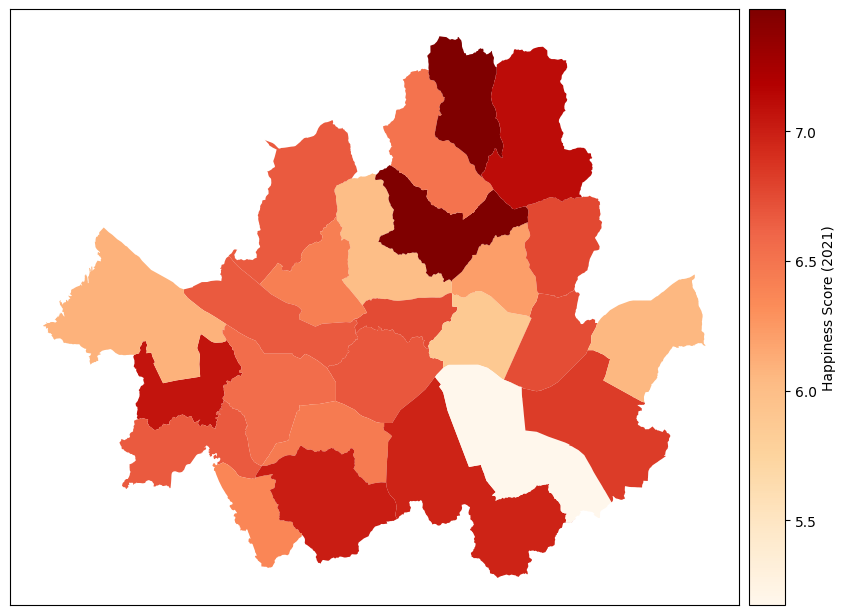

In [ ]:
map_ses = make_map("Seoul")
mapping_figure(map_ses, "Happiness_2021","Happiness Score (2021)")

## Plotting Korea

In [ ]:
## LOAD HAPPINESS SURVEY DATA
df2020_n = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020.csv"))
df2020 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"))
df2021 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"))
df2022 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2022.csv"))
df2023 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2023.csv"))

map = gp.read_file(os.path.join(DATA_DIR, "clean/korea-map-eng.shp"))

In [ ]:
# 2020 data Sido
df2020 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"))

df2020_sub = df2020[['sido', 'Si', 'gugun', 'Gu', 'happiness_score', 'happiness_ladder','co1']]

sido_unique = df2020_sub['sido'].unique()
sgg_nm_si_unique = map['SGG_NM_si'].unique()

numeric_columns = df2020_sub.select_dtypes(include='number').columns
df2020_sido = df2020_sub.groupby('Si')[numeric_columns].mean().reset_index()
df2020_sido["sido"] = df2020_sido["sido"].astype(int).astype(str)

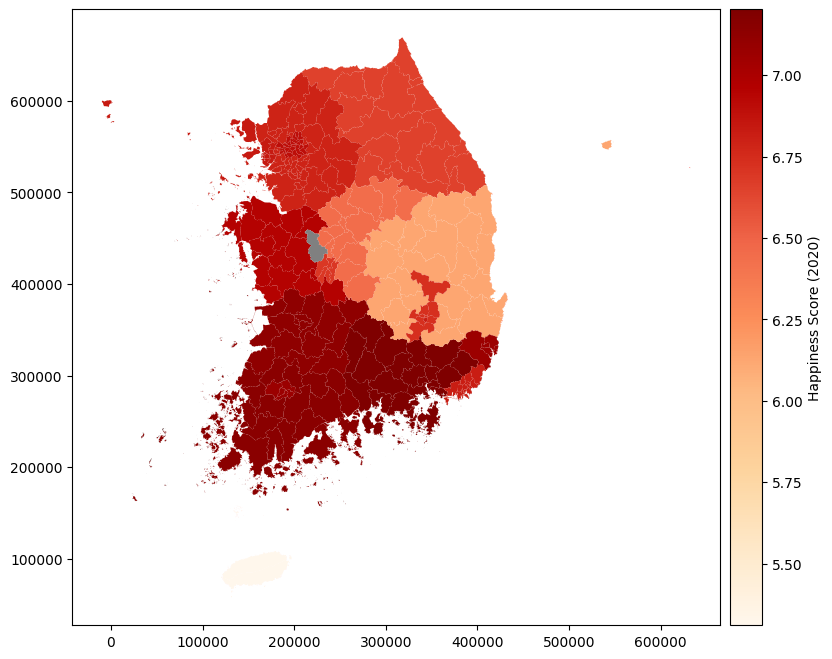

In [ ]:
map_hap2020_sido = map.merge(df2020_sido, left_on="SGG_NM_si", right_on="Si", how="outer")

# Plot Happiness (Si, 2021)
df = map_hap2020_sido.copy()
variable = "happiness_score"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'grey', 'label': 'No Data'},
    ax=ax,
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=df[variable].min(), vmax=df[variable].max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax, orientation="vertical")
cbar.set_label("Happiness Score (2020)")

plt.show()

In [ ]:
# # - Merge datasets
# map_hap2020_gugun = map.merge(df2020_gugun, left_on="SGG_NM_gug", right_on="gugun", how="outer")

# # Plot
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# map_hap2020_gugun.plot(
#     column="happiness_score",
#     cmap="OrRd",
#     missing_kwds={'color': 'white', 'label': 'No Data'},
#     ax=ax,
# )

# cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax)
# cbar.set_label('Happiness Score (2021)')

# plt.show()

In [ ]:
# 2021 data Sido
df2021 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"))
df2021.rename(columns={"co1":"covid"})

df2021['sido'] = df2021['sido'].replace(translation_dict1)
df2021['gugun'] = df2021['gugun'].replace(translation_dict2)

df2021["age"] = df2021["age"].astype(int)
df2021["gugun_cd"] = df2021["gugun_cd"].astype(int).astype(str)
df2021["sido_cd"] = df2021["sido_cd"].astype(int).astype(str)

df2021_sub = df2021[['sido_cd', 'sido', 'gugun_cd', 'gugun', 'age', 'happiness_score', 'happiness_ladder','co1']]

sido_unique = df2021_sub['sido'].unique()
sgg_nm_si_unique = map['SGG_NM_si'].unique()

improperly_merged_sido = [g for g in sido_unique if g not in sgg_nm_si_unique]
properly_extracted_sido = [g.split(", ")[1] if ", " in g else g for g in improperly_merged_sido]

replace_dict = dict(zip(improperly_merged_sido, properly_extracted_sido))
df2021_sub['sido'] = df2021_sub['sido'].replace(replace_dict)
df2021_sub['sido'] = df2021_sub['sido'].replace('Sejong-si', 'Sejong')

numeric_columns = df2021_sub.select_dtypes(include='number').columns
df2021_sido = df2021_sub.groupby('sido')[numeric_columns].mean().reset_index()

<ipython-input-262-c16dacffe915>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_sub['sido'] = df2021_sub['sido'].replace(replace_dict)
<ipython-input-262-c16dacffe915>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_sub['sido'] = df2021_sub['sido'].replace('Sejong-si', 'Sejong')


In [ ]:
# - Preprocessing 2021 Gu data
gugun_unique = df2021_sub['gugun'].unique()
sgg_nm_gug_unique = map['SGG_NM_gug'].unique()

improperly_merged_gugun = [g for g in gugun_unique if g not in sgg_nm_gug_unique]
properly_extracted_gugun = [g.split(", ")[1] if ", " in g else g for g in improperly_merged_gugun]

replace_dict = dict(zip(improperly_merged_gugun, properly_extracted_gugun))
df2021_sub['gugun'] = df2021_sub['gugun'].replace(replace_dict)
df2021_sub['gugun'] = df2021_sub['gugun'].replace('Sejong-si', 'Sejong')

numeric_columns = df2021_sub.select_dtypes(include='number').columns
df2021_gugun = df2021_sub.groupby('gugun')[numeric_columns].mean().reset_index()

<ipython-input-263-e8ffc6fcdeca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_sub['gugun'] = df2021_sub['gugun'].replace(replace_dict)
<ipython-input-263-e8ffc6fcdeca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_sub['gugun'] = df2021_sub['gugun'].replace('Sejong-si', 'Sejong')


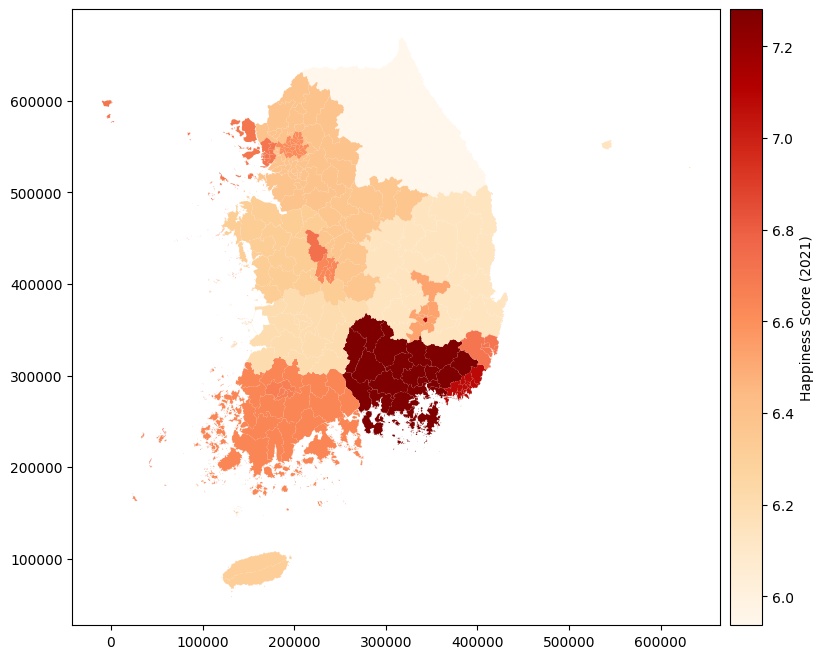

In [ ]:
map_hap2021_sido = map.merge(df2021_sido, left_on="SGG_NM_si", right_on="sido", how="outer")

# Plot Happiness (Si, 2021)
df = map_hap2021_sido.copy()
variable = "happiness_score"

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'grey', 'label': 'No Data'},
    ax=ax,
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=df[variable].min(), vmax=df[variable].max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax, orientation="vertical")
cbar.set_label("Happiness Score (2021)")

plt.show()

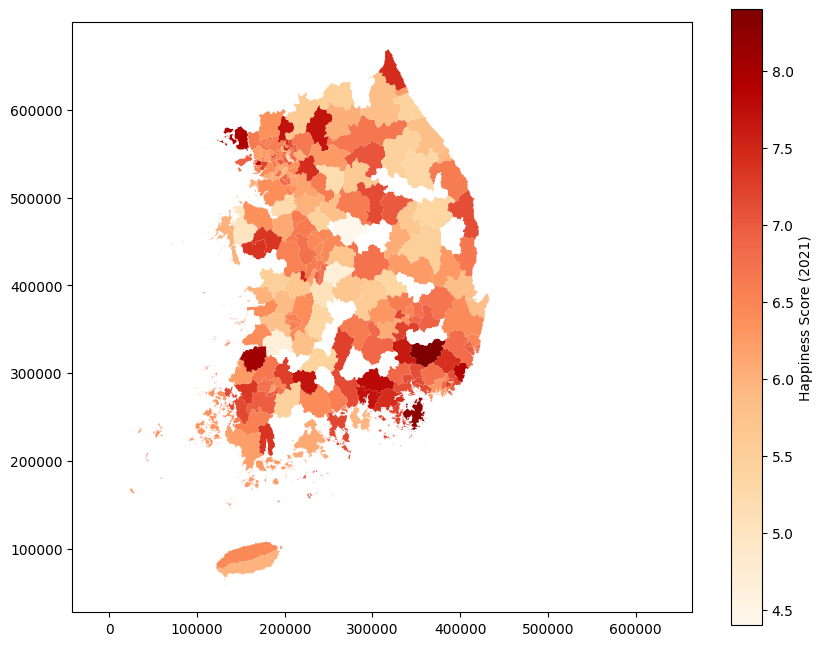

In [ ]:
# - Merge datasets
map_hap2021_gugun = map.merge(df2021_gugun, left_on="SGG_NM_gug", right_on="gugun", how="outer")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
map_hap2021_gugun.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'white', 'label': 'No Data'},
    ax=ax,
)

cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax)
cbar.set_label('Happiness Score (2021)')

plt.show()

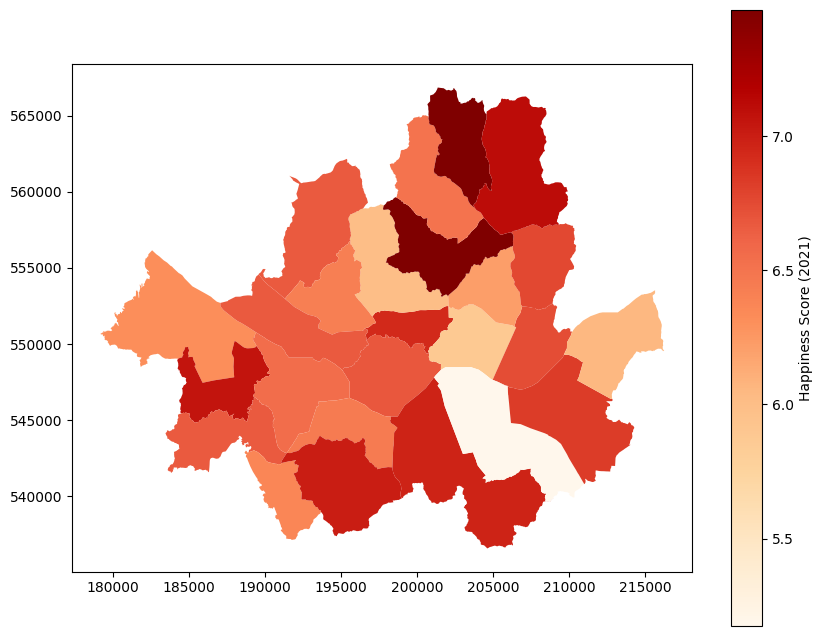

In [ ]:
map_seoul = map_hap2021_gugun[map_hap2021_gugun["SGG_NM_si"] == "Seoul"]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
map_seoul.plot(
    column="happiness_score",
    cmap="OrRd",
    missing_kwds={'color': 'grey', 'label': 'No Data'},
    ax=ax,
)

cbar = ax.get_figure().colorbar(ax.collections[0], ax=ax)
cbar.set_label('Happiness Score (2021)')

plt.show()

#Chapter 4.3. Happiness and SES factors in Seoul

# Data Preprocessing - Socioeconomic data (Seoul City - Gu based, 2020-2021)

## Economic data

### GRDP (2020-2021)

Gross Regional Domestic Product

서울특별시_자치구별 지역내 총생산 (2021)
https://www.data.go.kr/data/15085963/fileData.do


데이터 출처
https://data.seoul.go.kr/dataList/11057/S/2/datasetView.do


자치구별 지역내총생산(2015년 기준)
자료갱신일 : 2024-01-03 / 수록기간 : 년 2010 ~ 2021
출처 : 서울특별시, 서울특별시 지역내총생산

'지역내총생산(당해년가격) (백만원)': 'Gross Regional Domestic Product (Current Price) (Million Won)'

In [ ]:
# - Reload dictionary
df = df2021.copy()
df = df[["sido","sido_cd","gugun","gugun_cd"]]

unique_pairs = df[['sido', 'sido_cd']].drop_duplicates()
korea_si_code = dict(zip(unique_pairs['sido'], unique_pairs['sido_cd']))
print(korea_si_code)

unique_pairs = df[['sido_cd', 'sido']].drop_duplicates()
korea_code_si = dict(zip(unique_pairs['sido_cd'], unique_pairs['sido']))
print(korea_code_si)

unique_pairs = df[['gugun', 'gugun_cd']].drop_duplicates()
korea_gu_code = dict(zip(unique_pairs['gugun'], unique_pairs['gugun_cd']))
print(korea_gu_code)

unique_pairs = df[['gugun_cd', 'gugun']].drop_duplicates()
korea_code_gu = dict(zip(unique_pairs['gugun_cd'], unique_pairs['gugun']))
print(korea_code_gu)

{'Daejeon': '25', 'Seoul': '11', 'Gyeonggi-do': '31', 'Jeollabuk-do': '35', 'Chungcheongnam-do': '34', 'Gangwon-do': '32', 'Ulsan': '26', 'Busan': '21', 'Jeollanam-do': '36', 'Incheon': '23', 'Gyeongsangnam-do': '38', 'Jeju': '39', 'Daegu': '22', 'Chungcheongbuk-do': '33', 'Gyeongsangbuk-do': '37', 'Gwangju': '24', 'Sejong-si': '29'}
{'25': 'Daejeon', '11': 'Seoul', '31': 'Gyeonggi-do', '35': 'Jeollabuk-do', '34': 'Chungcheongnam-do', '32': 'Gangwon-do', '26': 'Ulsan', '21': 'Busan', '36': 'Jeollanam-do', '23': 'Incheon', '38': 'Gyeongsangnam-do', '39': 'Jeju', '22': 'Daegu', '33': 'Chungcheongbuk-do', '37': 'Gyeongsangbuk-do', '24': 'Gwangju', '29': 'Sejong-si'}
{'Seo-gu': '22030', 'Guro-gu': '11170', 'Gangnam-gu': '11230', 'Gwangju': '31250', 'Deokjin-gu, Jeonju': '35012', 'Gwanak-gu': '11210', 'Nonsan': '34060', 'Dongjak-gu': '11200', 'Seodaemun-gu': '11130', 'Wonju': '32020', 'Dongdaemun-gu': '11060', 'Deogyang-gu, Goyang': '31101', 'Buk-gu': '24040', 'Gwonseon-gu, Suwon': '31012',

In [ ]:
# GRDP (2020-2021)

df_gdp = pd.read_csv(os.path.join(DATA_DIR, "clean/자치구별+지역내총생산(2015년+기준)_20240916014929.csv"),header=1)
df_gdp = df_gdp[['자치구별(2)', '지역내총생산(당해년가격) (백만원)', '지역내총생산(당해년가격) (백만원).1']]

column_mapping = {'자치구별(2)': 'Gu',
                  '지역내총생산(당해년가격) (백만원)': 'GRDP_2020',
                  '지역내총생산(당해년가격) (백만원).1': 'GRDP_2021',}

df_gdp.rename(columns=column_mapping, inplace=True)

df_gdp['Gu'] = df_gdp['Gu'].map(translation_dict2)
df_gdp['Gu_Code'] = df_gdp['Gu'].map(korea_gu_code) # Happiness Survey 2021 based code
df_gdp.dropna(inplace=True)

### Land Price (2020-2021)

서울시 개별공시지가 데이터:

*   List item
*   List item



https://data.seoul.go.kr/dataList/OA-1180/F/1/datasetView.do#

In [ ]:
def land_preprocess(df):
  column_mapping = {
      '시도명': 'Province',
      '시군구명': 'City_District',
      '법정동명': 'Legal_Dong',
      '토지코드': 'Land_Code',
      '공시지가(원/㎡)': 'Land_Price',
      '시군구코드': 'City_District_Code',
      '법정동코드': 'Legal_Dong_Code',
      '필지구분코드': 'Parcel_Classification_Code',
      '필지구분명': 'Parcel_Classification_Name',
      '본번': 'Main_Number',
      '부번': 'Sub_Number',
      '기준년도': 'Reference_Year',
      '기준년월': 'Reference_Year_Month'
  }

  df.rename(columns=column_mapping, inplace=True)

  df = df[['City_District','City_District_Code', 'Land_Price']]

  df['City_District_Code'] = df['City_District_Code'].astype(str)
  mask = df['City_District_Code'].str.startswith('11')  # Example condition is for Seoul (The data itself is Seoul only)
  df = df[mask]

  df['Land_Price'] = pd.to_numeric(df['Land_Price'], errors='coerce')
  grouped_df = df.groupby('City_District_Code').agg({
      'Land_Price': 'sum'}).reset_index()

  merged_df = pd.merge(grouped_df, df[['City_District_Code', 'City_District']].drop_duplicates(),
                         on='City_District_Code', how='left')

  return merged_df

In [ ]:
# Residential property price (2020-2021)
df = pd.read_csv(os.path.join(DATA_DIR,"clean/공시지가_2020년.csv"), encoding='cp949')
land_2020 = land_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"clean/공시지가_2021년.csv"), encoding='cp949')
land_2021 = land_preprocess(df)

df = pd.merge(land_2020, land_2021, left_on="City_District_Code", right_on="City_District_Code")
df_land = df.rename(columns={"City_District_x":"Gu",
                            "City_District_Code":"Gu_Code",
                            "Land_Price_x":"Land_Price_2020",
                            "Land_Price_y":"Land_Price_2021"})
df_land = df_land.drop("City_District_y", axis=1)
df_land["Gu"] = df_land["Gu"].map(translation_dict2)

<ipython-input-270-945e237349ce>:2: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR,"clean/공시지가_2020년.csv"), encoding='cp949')
<ipython-input-269-68b4273dee23>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_District_Code'] = df['City_District_Code'].astype(str)
<ipython-input-270-945e237349ce>:5: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR,"clean/공시지가_2021년.csv"), encoding='cp949')
<ipython-input-269-68b4273dee23>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

### Employment Count (2020-2021)

고용노동데이터 분석시스템
https://eis.work.go.kr/elds/edwss/etc/ug/selectSupyDataList.do#none

Data availability: 2020-2022

1. 취업현황_지역(월)
데이터셋 설명:	워크넷을 통한 취업실적을 시군구 단위로 분석할 수 있는 월 단위 통계자료(지역-시군구, 산업-대분류, 직종-중분류, 연령, 학력)

- 교육수준 (서울시 구별 평균)
- 취업자 수 (서울시 구별 합산)

2. 유효구인현황(전체)
데이터셋 설명:	월별 유효구인 실적을 시군구 단위로 분석할 수 있는 통계자료(지역-시군구, 산업-소분류, 직종-중분류, 규모, 학력)

- 유효구인 수(서울시 구별 합산)

3. 유효구직현황(전체)
데이터셋 설명:	월별 유효구인 실적을 시군구 단위로 분석할 수 있는 통계자료(지역-시군구, 산업-소분류, 직종-중분류, 규모, 학력)

- 유효구직 수 (서울시 구별 합산)

4. 근로자훈련실시현황(월)
데이터셋 설명:	근로자 훈련과정 훈련 실적을 지역별로 분석할 수 있는 월 단위 통계자료(지역-시군구, 연령, 학력)

- 근로자 훈련실시 수 (서울시 구별 합산)

고용행정통계데이터 시군구코드는 표진시군구코드와 다르므로 구 이름으로 합쳐야 함.
지역시군구코드는 다음 엑셀파일에서 확인 가능(위 웹사이트에서 다운로드)

https://docs.google.com/spreadsheets/d/1qhDlGMVSFG90C6Qtg3xYqlSv7ZhFO-4e/edit?usp=drive_web&ouid=104474347926817489094&rtpof=true


In [ ]:
# Since the data used in 고용행정통계데이터 has different Gu Code, the dataset has to translated into Gu name

district_data = {
    0: ("11110", "종로구"),
    1: ("11140", "중구"),
    2: ("11170", "용산구"),
    3: ("11215", "성동구"),
    4: ("11230", "광진구"),
    5: ("11260", "동대문구"),
    6: ("11290", "중랑구"),
    7: ("11305", "성북구"),
    8: ("11320", "강북구"),
    9: ("11350", "도봉구"),
    10: ("11380", "노원구"),
    11: ("11410", "은평구"),
    12: ("11440", "서대문구"),
    13: ("11470", "마포구"),
    14: ("11500", "양천구"),
    15: ("11530", "강서구"),
    16: ("11545", "구로구"),
    17: ("11560", "금천구"),
    18: ("11590", "영등포구"),
    19: ("11620", "동작구"),
    20: ("11650", "관악구"),
    21: ("11680", "서초구"),
    22: ("11710", "강남구"),
    23: ("11740", "송파구"),
    24: ("11770", "강동구"),
}


In [ ]:
def employment_preprocess(df):
    df = df[["마감년월", "근무시도", "근무시군구", "직종중분류","고용형태",
                                      "거주시도", "거주시군구",	"성별",	"연령5세단위",	"학력",	"취업건수"]]
    column_mapping = {
        "마감년월": "End_Date",
        "근무시도": "Work_Sido",
        "근무시군구": "Work_Sigungu",
        "직종중분류": "Job_Category",
        "고용형태": "Employment_Type",
        "거주시도": "Residence_Sido",
        "거주시군구": "Residence_Sigungu",
        "성별": "Gender",
        "연령5세단위": "Age_Group_5_Years",
        "학력": "Education_Level",
        "취업건수": "Employment_Count"
    }

    df.rename(columns=column_mapping, inplace=True)

    df = df[['Residence_Sigungu','Employment_Count','Education_Level']]

    df['Residence_Sigungu'] = df['Residence_Sigungu'].astype(str)
    mask = df['Residence_Sigungu'].str.startswith('11')
    df = df[mask]

    df['Employment_Count'] = pd.to_numeric(df['Employment_Count'], errors='coerce')
    df['Education_Level'] = pd.to_numeric(df['Education_Level'], errors='coerce')

    df = df.groupby('Residence_Sigungu').agg({
        'Employment_Count': 'sum',
        'Education_Level': 'mean'}).reset_index()

    return df

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2020년.txt"), sep='|', encoding='utf-8')
employment_2020 = employment_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2021년.txt"), sep='|', encoding='utf-8')
employment_2021 = employment_preprocess(df)

df = pd.merge(employment_2020, employment_2021, left_on="Residence_Sigungu", right_on="Residence_Sigungu")
df = df.rename(columns={"Residence_Sigungu":"Gu_Code",
                            "Employment_Count_x":"Employment_2020",
                            "Employment_Count_y":"Employment_2021"})
df = df.drop(columns=['Education_Level_x','Education_Level_y'])

df["Gu"] = [district_data[i][1] for i in range(len(df))]
df["Gu"] = df['Gu'].map(translation_dict2)
df_employment = df.drop("Gu_Code",axis=1)

<ipython-input-272-bab9b39bc638>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)
<ipython-input-273-606a3845c6d2>:4: DtypeWarning: Columns (1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2021년.txt"), sep='|', encoding='utf-8')
<ipython-input-272-bab9b39bc638>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)


### Job Openings (2020-2021)

In [ ]:
def recruiting_preprocess(df):
  df.columns.tolist()

  column_mapping = {
      '마감년월': 'End_Date',
      '근무시도': 'Work_Sido',
      '근무시군구': 'Work_Sigungu',
      '표준산업대분류': 'Standard_Industry_Large',
      '표준산업중분류': 'Standard_Industry_Medium',
      '표준산업소분류': 'Standard_Industry_Small',
      '산업버전': 'Industry_Version',
      '규모': 'Scale',
      '직종중분류': 'Job_Category',
      '직종버전': 'Job_Version',
      '고용형태': 'Employment_Type',
      '학력': 'Education_Level',
      '유효구인인원수': 'Job_Openings'
  }

  df.rename(columns=column_mapping, inplace=True)

  df = df[['Work_Sigungu','Job_Openings']]

  df['Work_Sigungu'] = df['Work_Sigungu'].astype(str)
  mask = df['Work_Sigungu'].str.startswith('11')
  df = df[mask]

  df['Job_Openings'] = pd.to_numeric(df['Job_Openings'], errors='coerce')
  df = df.groupby('Work_Sigungu').agg({
      'Job_Openings': 'sum',
  }).reset_index()

  return df

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR,"labor/5.유효구인현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
recruiting_2020 = recruiting_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/5.유효구인현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
recruiting_2021 = recruiting_preprocess(df)

df = pd.merge(recruiting_2020, recruiting_2021, left_on="Work_Sigungu", right_on="Work_Sigungu")
df = df.rename(columns={"Work_Sigungu":"Gu_Code",
                            "Job_Openings_x":"Jobs_2020",
                             "Job_Openings_y":"Jobs_2021"})

df["Gu"] = [district_data[i][1] for i in range(len(df))]
df["Gu"] = df['Gu'].map(translation_dict2)
df_recruiting = df.drop("Gu_Code",axis=1)

<ipython-input-274-4b264edaeb2e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work_Sigungu'] = df['Work_Sigungu'].astype(str)
<ipython-input-274-4b264edaeb2e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work_Sigungu'] = df['Work_Sigungu'].astype(str)


### Job Seekers (2021)

In [ ]:
def jobsearching_preprocess(df):
  column_mapping = {
      '마감년월': 'End_Date',
      '직종중분류': 'Job_Category',
      '직종버전': 'Job_Version',
      '고용형태': 'Employment_Type',
      '거주시도': 'Residence_Sido',
      '거주시군구': 'Residence_Sigungu',
      '성별': 'Gender',
      '연령5세단위': 'Age_Group_5_Years',
      '학력': 'Education_Level',
      '유효구직인원수': 'Effective_Job_Seekers'
  }

  df.rename(columns=column_mapping, inplace=True)

  df = df[[ 'Residence_Sigungu','Effective_Job_Seekers']]

  df['Residence_Sigungu'] = df['Residence_Sigungu'].astype(str)
  mask = df['Residence_Sigungu'].str.startswith('11')
  df = df[mask]

  df['Effective_Job_Seekers'] = pd.to_numeric(df['Effective_Job_Seekers'], errors='coerce')

  df = df.groupby('Residence_Sigungu').agg({
      'Effective_Job_Seekers': 'sum',
  }).reset_index()

  return df

In [ ]:
# 2020 data did not exist

# Does not exist
#df = pd.read_csv(os.path.join(DATA_DIR,"labor/6.유효구직현황(전체)_2020년.txt"), sep='|', encoding='utf-8')
#recruiting_2020 = jobsearching_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/6.유효구직현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
recruiting_2021 = jobsearching_preprocess(df)

#df = pd.merge(recruiting_2020, recruiting_2021, left_on="Work_Sigungu", right_on="Work_Sigungu")
df = recruiting_2021.copy()
df = df.rename(columns={"Residence_Sigungu":"Gu_Code",
                            #"Job_Openings_x":"Jobs_2020",
                             "Effective_Job_Seekers":"JobSeekers_2021"})

df["Gu"] = [district_data[i][1] for i in range(len(df))]
df["Gu"] = df['Gu'].map(translation_dict2)
df_jobsearch = df.drop("Gu_Code",axis=1)

<ipython-input-277-abe6fa69e235>:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR,"labor/6.유효구직현황(전체)_2021년.txt"), sep='|', encoding='utf-8')
<ipython-input-276-e2f3f65b464c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_Sigungu'] = df['Residence_Sigungu'].astype(str)


#### Merged econ data

In [ ]:
# Merge dataset based on Gu name (since the code are different from sources)
df = pd.merge(df_gdp, df_land, left_on="Gu", right_on="Gu", how="inner")
df = pd.merge(df, df_employment, left_on="Gu", right_on="Gu", how="inner")
df = pd.merge(df, df_recruiting, left_on="Gu", right_on="Gu", how="inner")
df = pd.merge(df, df_jobsearch, left_on="Gu", right_on="Gu", how="inner")

df = df.rename(columns={"Gu_Code_x":"Gu_Code"})
df_econ = df[['Gu', 'Gu_Code','GRDP_2020', 'GRDP_2021', 'Land_Price_2020', 'Land_Price_2021',
              'Employment_2020','Employment_2021', 'Jobs_2020','Jobs_2021', 'JobSeekers_2021']]

## Social data

고용노동데이터 분석시스템

https://eis.work.go.kr/elds/edwss/etc/ug/selectSupyDataList.do#none

Data availability: 2020-2022

유효구직 수 (서울시 구별 합산)
근로자훈련실시현황(월) 데이터셋 설명: 근로자 훈련과정 훈련 실적을 지역별로 분석할 수 있는 월 단위 통계자료(지역-시군구, 연령, 학력)
근로자 훈련실시 수 (서울시 구별 합산)

### Education Level (2020-2021)

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2020년.txt"), sep='|', encoding='utf-8')
education_2020 = employment_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2021년.txt"), sep='|', encoding='utf-8')
education_2021 = employment_preprocess(df)

df = pd.merge(employment_2020, employment_2021, left_on="Residence_Sigungu", right_on="Residence_Sigungu")
df = df.rename(columns={"Residence_Sigungu":"Gu_Code",
                            "Education_Level_x":"Education_2020",
                            "Education_Level_y":"Education_2021"})

df["Gu"] = [district_data[i][1] for i in range(len(df))]
df["Gu"] = df['Gu'].map(translation_dict2)
df_education = df.drop(columns=['Employment_Count_x','Employment_Count_y', 'Gu_Code'], axis=1)

<ipython-input-272-bab9b39bc638>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)
<ipython-input-279-80de80d6d2fe>:4: DtypeWarning: Columns (1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR,"labor/3.취업현황(월)_시군구_산업대분류_2021년.txt"), sep='|', encoding='utf-8')
<ipython-input-272-bab9b39bc638>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)


### Number of Trainees (2020-2021)

In [ ]:
def trainees_preprocess(df):

  column_mapping = {
      '마감년도': 'End_Year',
      '기준년월': 'Reference_Year_Month',
      '훈련기관시도': 'Training_Institution_Sido',
      '훈련기관시군구': 'Training_Institution_Sigungu',
      '성별': 'Gender',
      '연령5세단위': 'Age_Group_5_Years',
      '훈련과정구분': 'Training_Course_Type',
      '실시훈련생인원수': 'Number_Of_Trainees'
  }

  df.rename(columns=column_mapping, inplace=True)

  # Subset columns
  df = df[['Training_Institution_Sigungu','Number_Of_Trainees']]

  # Subset Seoul
  df['Training_Institution_Sigungu'] = df['Training_Institution_Sigungu'].astype(str)
  mask = df['Training_Institution_Sigungu'].str.startswith('11')
  df = df[mask]

  # Group by 'sigungu'
  df['Number_Of_Trainees'] = pd.to_numeric(df['Number_Of_Trainees'], errors='coerce')
  df = df.groupby('Training_Institution_Sigungu').agg({
      'Number_Of_Trainees': 'sum'}).reset_index()

  return df

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR,"labor/12.근로자훈련실시현황(월)_2021년.txt"), sep='|', encoding='utf-8')
df_2020 = trainees_preprocess(df)

df = pd.read_csv(os.path.join(DATA_DIR,"labor/12.근로자훈련실시현황(월)_2020년.txt"), sep='|', encoding='utf-8')
df_2021 = trainees_preprocess(df)

df = pd.merge(df_2020, df_2021, left_on="Training_Institution_Sigungu", right_on="Training_Institution_Sigungu")
df = df.rename(columns={"Training_Institution_Sigungu":"Gu_Code",
                            "Number_Of_Trainees_x":"Trainees_2020",
                             "Number_Of_Trainees_y":"Trainees_2021"})

df["Gu"] = [district_data[i][1] for i in range(len(df))]
df["Gu"] = df['Gu'].map(translation_dict2)
df_trainees = df.drop(columns=['Gu_Code'], axis=1)

<ipython-input-280-a2db54b36b27>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Training_Institution_Sigungu'] = df['Training_Institution_Sigungu'].astype(str)
<ipython-input-280-a2db54b36b27>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Training_Institution_Sigungu'] = df['Training_Institution_Sigungu'].astype(str)


### Covid Impact & Cantril Ladder (2021)

In [ ]:
happy2021, meta = pyreadstat.read_sav(os.path.join(DATA_DIR,"korea-2021/kor_data_20210003_V2.1.sav"))

happy2021 = happy2021[happy2021["sido"]=="서울특별시"]
happy2021.rename(columns={"c1": "CantrilLadder_2021","co1":"Covid_2021"}, inplace=True)
happy2021 = happy2021[["gugun","gugun_cd", "Covid_2021","CantrilLadder_2021"]]

happy2021 = happy2021.groupby('gugun').mean().reset_index()
happy2021["gugun_cd"] = [happy2021["gugun_cd"][i].astype(int) for i in range(len(happy2021["gugun_cd"]))]

happy2021["Gu"] = happy2021["gugun"].map(translation_dict2)
df_covid_ladder_2021 = happy2021[["Gu", "Covid_2021", "CantrilLadder_2021"]]

### Under Livelihood(2021)

Number of households under the basic livelihood security program

https://www.data.go.kr/data/15047721/fileData.do


 한국사회보장정보원_기초주거급여 주거유형별 수급가구수[월간]


data source:

https://www.bokjiro.go.kr/ssis-tbu/twatga/sociGuaStat/SociGuaStatDetailIframe.do?datsNo=11&datsClNo=1013&datsClCrit=WS


In [ ]:
folder_path = '/content/drive/Shareddrives/SICSS_2024_groupproject/2_data/data-korea/clean/seoul_social'

column_mapping = {
    '통계연월': 'YearMonth',
    '통계시도명': 'si',
    '통계시군구명': 'gungu',
    '주거유형': 'Housing_Type',
    '수급가구수': 'Under_Livelihood'
}

dataframes = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if filename.endswith('.csv'):
        try:
            df_social = pd.read_csv(file_path, encoding='euc-kr')
        except UnicodeDecodeError:
            df_social = pd.read_csv(file_path, encoding='utf-8')
        print("Current columns:", df_social.columns)

        df_social.rename(columns=column_mapping, inplace=True)
        print("Renamed columns:", df_social.columns)

        dataframes.append(df_social)

combined_df = pd.concat(dataframes, ignore_index=True)

df = combined_df[combined_df["si"] == "서울특별시"]
print(df.columns.tolist)

Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Under_Livelihood'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Under_Livelihood'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Under_Livelihood'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Under_Livelihood'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명', '주거유형', '수급가구수'], dtype='object')
Renamed columns: Index(['YearMonth', 'si', 'gungu', 'Housing_Type', 'Under_Livelihood'], dtype='object')
Current columns: Index(['통계연월', '통계시도명', '통계시군구명',

In [ ]:
df = df[["gungu","Under_Livelihood"]]
df = df.groupby("gungu").mean().reset_index()
df["Gu"] = df["gungu"].map(translation_dict2)
df.rename(columns={"Under_Livelihood":"UnderLives_2021"}, inplace=True)
df.drop("gungu", axis=1, inplace=True)
df_livelihood = df.copy()

### Total Living Population (2020-2021)

In [ ]:
def airdataset_preprocess(df, st_year, en_year):
  # Dictionary to map Korean column names to English
  column_mapping = {
      '기준일': 'date',
      '시군구코드': 'sido',
      '시군구명': 'gungu',
      '총생활인구수': 'TotalLivingPopulation',
      '아황산가스': 'SO2',
      '일산화탄소': 'CO',
      '오존': 'Ozone',
      '이산화질소': 'NO2',
      'PM10': 'PM10',
      'PM2_5': 'PM2.5'
  }

  # Rename columns
  df.rename(columns=column_mapping, inplace=True)

  # Convert the 'date' column to datetime format
  df['date'] = pd.to_datetime(df['date'])

  # Aggregate the data by 'gungug' (district)
  aggregated_air = df.groupby('gungu').agg({
      'SO2': 'mean',  # Average SO2 levels
      'CO': 'mean',  # Average CO levels
      'Ozone': 'mean',  # Average Ozone levels
      'NO2': 'mean',  # Average NO2 levels
      'PM10': 'mean',  # Average PM10 levels
      'PM2.5': 'mean'  # Average PM2.5 levels
  }).reset_index()

  st_year = 2020
  en_year = 2021
  df = df[(df['date'].dt.year >= st_year) & (df['date'].dt.year <= en_year)]

  df.loc[:, 'date'] = pd.to_datetime(df['date'])

  df['gungu'] = df['gungu'].map(translation_dict2)

  df.dropna()

  return df

In [ ]:
def air_year_separate_preprocess(df, st_year):
  df = df[df['date'].dt.year == st_year]
  numeric_columns = df.select_dtypes(include='number').columns
  df = df.groupby('gungu')[numeric_columns].mean()
  df = df.reset_index()

  df["sido"] = df["sido"].astype(int)
  return df

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, "clean/seoul_airquality.csv"), encoding='euc-kr')
df = airdataset_preprocess(df, 2020, 2021)

df_2020 = air_year_separate_preprocess(df, 2020)
df_2021 = air_year_separate_preprocess(df, 2021)

<ipython-input-285-36a000a17f9b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gungu'] = df['gungu'].map(translation_dict2)


In [ ]:
df_pop = pd.DataFrame()
df_pop["Gu"] = df_2020["gungu"]
df_pop["Population_2020"] = df_2020["TotalLivingPopulation"]
df_pop["Population_2021"] = df_2021["TotalLivingPopulation"]

#### Merged social data

In [ ]:
df = pd.merge(df_education, df_trainees, left_on="Gu", right_on="Gu", how="inner")
df = pd.merge(df, df_covid_ladder_2021, left_on="Gu", right_on="Gu", how="inner") # Change this dataset later
df = pd.merge(df, df_livelihood, left_on="Gu", right_on="Gu", how="inner")
df = pd.merge(df, df_pop, left_on="Gu", right_on="Gu", how="inner")

columns_order = ['Gu'] + [col for col in df.columns if col != 'Gu']
df_soc = df[columns_order]

## Environmental data

### SO2, CO, Ozone, NO2, PM10, PM2.5 (2020-2021)

한국환경산업기술원_서울 생활인구 및 대기오염 측정 현황
https://www.data.go.kr/data/15108051/fileData.do

In [ ]:
df_air = pd.DataFrame()
df_air["Gu"] = df_2020["gungu"]
l = ["SO2", "CO","Ozone","NO2","PM10","PM2.5"]
for i in l:
  df_air[i+"_2020"] = df_2020[i]
  df_air[i+"_2021"] = df_2021[i]

### Precipitation (2021)

서울시 강우량 정보

https://data.seoul.go.kr/dataList/OA-1168/S/1/datasetView.do

서울시내 강우량 정보를 강우량 측정계명, 구청명, 10분 누적 강우량 정보를 제공합니다.
(예: 자료수집시각 13:09인 경우 13:00:00~13:09:59 까지 온 강우량)
- 강우량관측소 : 비가오는 양을 측정하는 시스템으로 우리시에는 47개소의 관측소가 있으며 시·자치구 재해대책상황실에서 실시간으로 강우량자료를 전송받고 있습니다.
※ Sheet 및 OpenAPI 서비스는 현재일 기준으로 31일치 데이터만 서비스 합니다.
※ File 서비스는 2020년11월10일 이후로 매달 제공합니다.


**2020년 12월, 2021년, 2022년 자료 있음**

In [ ]:
def precip_preprocess(df):
  dfs = []

  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      file_list = zip_ref.namelist()
      print("Files in ZIP:", file_list)  # This prints the names of files in the zip archive

      for csv_filename in file_list:
          if csv_filename.endswith('.csv'):  # Check if the file is a CSV
              with zip_ref.open(csv_filename) as csv_file:
                  df = pd.read_csv((csv_file), encoding='cp949')
                  dfs.append(df)  # Append each DataFrame to the list

  df = pd.concat(dfs, ignore_index=True)
  return df

In [ ]:
# Path to the ZIP file
zip_file_path = os.path.join(DATA_DIR, "../data-seoul/서울시_강우량_정보_2021년.zip")
precip2021 = precip_preprocess(zip_file_path)

Files in ZIP: ['╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ01┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ02┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ03┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ04┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ05┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ06┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ07┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ08┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ09┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ10┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ11┐∙.csv', '╝¡┐∩╜├_░¡┐∞╖«_┴ñ║╕_2021│Γ12┐∙.csv']


In [ ]:
# Aggregate the data by '구청명'
aggregated_precipitation = precip2021.groupby('구청명').agg({
    '10분우량': 'mean'
}).reset_index()

# Rename the columns to English
aggregated_precipitation.rename(columns={
    '구청명': 'Gu',
    '10분우량': 'Total_Rainfall_10min_2021'
}, inplace=True)

df = aggregated_precipitation.copy()
df["Gu"] = df["Gu"].map(translation_dict2)
df.rename(columns={"Total_Rainfall_10min_2021":"Precipitation_2021"}, inplace=True)
df_precip = df.copy()

#### Merged environmental data

In [ ]:
df = pd.merge(df_air, df_precip, left_on="Gu", right_on="Gu", how="inner")

# Reorder the columns with "Gu" first
columns_order = ['Gu'] + [col for col in df.columns if col != 'Gu']
df_env = df[columns_order]

## Merge all SES dataset

In [ ]:
df = pd.merge(df_econ, df_soc, left_on="Gu", right_on="Gu", how="inner")
df = pd.merge(df, df_env, left_on="Gu", right_on="Gu", how="inner")

# Reorder the columns with "Gu" first
columns_order = ['Gu'] + [col for col in df.columns if col != 'Gu']
df_ses = df[columns_order]

In [ ]:
print(df_ses.columns.tolist())

['Gu', 'Gu_Code', 'GRDP_2020', 'GRDP_2021', 'Land_Price_2020', 'Land_Price_2021', 'Employment_2020', 'Employment_2021', 'Jobs_2020', 'Jobs_2021', 'JobSeekers_2021', 'Education_2020', 'Education_2021', 'Trainees_2020', 'Trainees_2021', 'Covid_2021', 'CantrilLadder_2021', 'UnderLives_2021', 'Population_2020', 'Population_2021', 'SO2_2020', 'SO2_2021', 'CO_2020', 'CO_2021', 'Ozone_2020', 'Ozone_2021', 'NO2_2020', 'NO2_2021', 'PM10_2020', 'PM10_2021', 'PM2.5_2020', 'PM2.5_2021', 'Precipitation_2021']


In [ ]:
df_ses.to_csv(os.path.join(DATA_DIR, "clean/seoul-ses-2020-2021.csv"), index=False)

#Data Visualization

In [ ]:
# Reload dataset
#df2020_n = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020.csv"))
#df2020 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2020-pre.csv"))
df2021 = pd.read_csv(os.path.join(DATA_DIR, "clean/korea-happiness-2021.csv"))

ses = pd.read_csv("/content/drive/Shareddrives/SICSS_2024_groupproject/2_data/data-korea/clean/seoul-ses-2020-2021.csv")
print(ses.columns.tolist())

['Gu', 'Gu_Code', 'GRDP_2020', 'GRDP_2021', 'Land_Price_2020', 'Land_Price_2021', 'Employment_2020', 'Employment_2021', 'Jobs_2020', 'Jobs_2021', 'JobSeekers_2021', 'Education_2020', 'Education_2021', 'Trainees_2020', 'Trainees_2021', 'Covid_2021', 'CantrilLadder_2021', 'UnderLives_2021', 'Population_2020', 'Population_2021', 'SO2_2020', 'SO2_2021', 'CO_2020', 'CO_2021', 'Ozone_2020', 'Ozone_2021', 'NO2_2020', 'NO2_2021', 'PM10_2020', 'PM10_2021', 'PM2.5_2020', 'PM2.5_2021', 'Precipitation_2021']


In [ ]:
# # Year = 2020
# df = df2020[df2020["sido"] == 1.0]
# df= df.groupby("gugun").mean()
# df["happiness_score_2020"]= df["happiness_score"]

# seoul2020 = ses[["Gu","Gu_Code",
#                    "GRDP_2020","Land_Price_2020","Employment_2020", "Jobs_2020",
#                    "Education_2020", "Trainees_2020",
#                    #"Covid_2020", "CantrilLadder_2020",
#                    "Population_2020",
#                    "SO2_2020","CO_2020","Ozone_2020","NO2_2020","PM10_2020", "PM2.5_2020"]]


In [ ]:
# Merge 2021 data

# Happiness Seoul (2021)
df = df2021[df2021["sido_cd"] == 11.0]
df = df[["gugun","happiness_score"]]
df= df.groupby("gugun").mean().reset_index()
df["Gu"] = df["gugun"].map(translation_dict2)
df = df.drop("gugun", axis=1)

# Seoul SES (2021)
seoul2021 = ses[["Gu","Gu_Code",
                   "GRDP_2021","Land_Price_2021","Employment_2021", "Jobs_2021", "JobSeekers_2021",
                   "Education_2021", "Trainees_2021",
                   "Covid_2021", "CantrilLadder_2021",
                   "UnderLives_2021", "Population_2021",
                   "SO2_2021","CO_2021","Ozone_2021","NO2_2021","PM10_2021", "PM2.5_2021"]]

df = pd.merge(df, seoul2021, left_on="Gu", right_on="Gu", how="inner")

df.rename(columns={"happiness_score":"Happiness Score",
                   "GRDP_2021":"GRDP",
                   "Land_Price_2021":"Land Price",
                   "Employment_2021":"Employment",
                   "Jobs_2021":"Jobs",
                   "JobSeekers_2021":"Job Seekers",
                   "Education_2021":"Education",
                   "Trainees_2021":"Trainees",
                   "Covid_2021":"Covid",
                   "CantrilLadder_2021":"Cantril Ladder",
                   "UnderLives_2021":"Under Lives",
                   "Population_2021":"Population",
                   "SO2_2021":"SO2",
                   "CO_2021":"CO",
                   "Ozone_2021":"Ozone",
                   "NO2_2021":"NO2",
                   "PM10_2021":"PM10",
                   "PM2.5_2021":"PM2.5",}, inplace=True)


df_2021 = df.copy()

In [ ]:
data = df_2021.copy()
data_factors = data.drop(columns=['Gu','Gu_Code'])

scaler = StandardScaler()
data_factors = pd.DataFrame(scaler.fit_transform(data_factors), columns=data_factors.columns)

## Distribution

In [ ]:
df_2021.describe()

,Happiness Score,Gu_Code,GRDP,Land Price,Employment,Jobs,Job Seekers,Education,Trainees,Covid,Cantril Ladder,Under Lives,Population,SO2,CO,Ozone,NO2,PM10,PM2.5
count,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000,25.00000,25.000000,25.0000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.584513,11968.000000,1.888161e+07,1.621506e+11,10594.560000,9917.720000,130451.52000,3.983777,4969.8400,4.853908,6.163535,499.625067,430720.084853,0.003097,0.463148,0.027809,0.023564,38.071119,19.802375
std,0.505946,2892.053769,1.926882e+07,8.485334e+10,4302.019362,6793.226795,47635.68233,0.143070,5720.1318,0.145476,0.693552,215.550860,140327.942182,0.000338,0.041895,0.001801,0.003384,1.870102,1.042152
min,5.173653,11010.000000,3.462961e+06,5.118276e+10,2678.000000,3295.000000,36793.00000,3.737367,162.0000,4.504673,4.280000,183.015686,237785.977200,0.002504,0.398630,0.023193,0.016249,33.884615,17.690411
25%,6.375000,11080.000000,6.554954e+06,1.101880e+11,8535.000000,5346.000000,108281.00000,3.924755,1272.0000,4.770492,5.708333,349.550000,357660.434576,0.002937,0.424932,0.026638,0.022341,36.810959,19.076712
50%,6.669118,11140.000000,9.364063e+06,1.492735e+11,10302.000000,6790.000000,127067.00000,3.988529,2743.0000,4.894040,6.358079,462.564516,393428.982602,0.003052,0.455890,0.027879,0.024241,37.684932,19.857534
75%,6.825328,11210.000000,2.139931e+07,1.725073e+11,13438.000000,11775.000000,151772.00000,4.038998,6720.0000,4.970000,6.691589,587.096070,501159.924645,0.003263,0.496023,0.028792,0.025926,39.443836,20.665753
max,7.471429,22010.000000,7.792402e+07,3.546456e+11,18787.000000,30296.000000,223000.00000,4.307359,21901.0000,5.000000,7.065574,988.085603,812843.836996,0.004088,0.548175,0.031316,0.027359,41.638356,21.715068


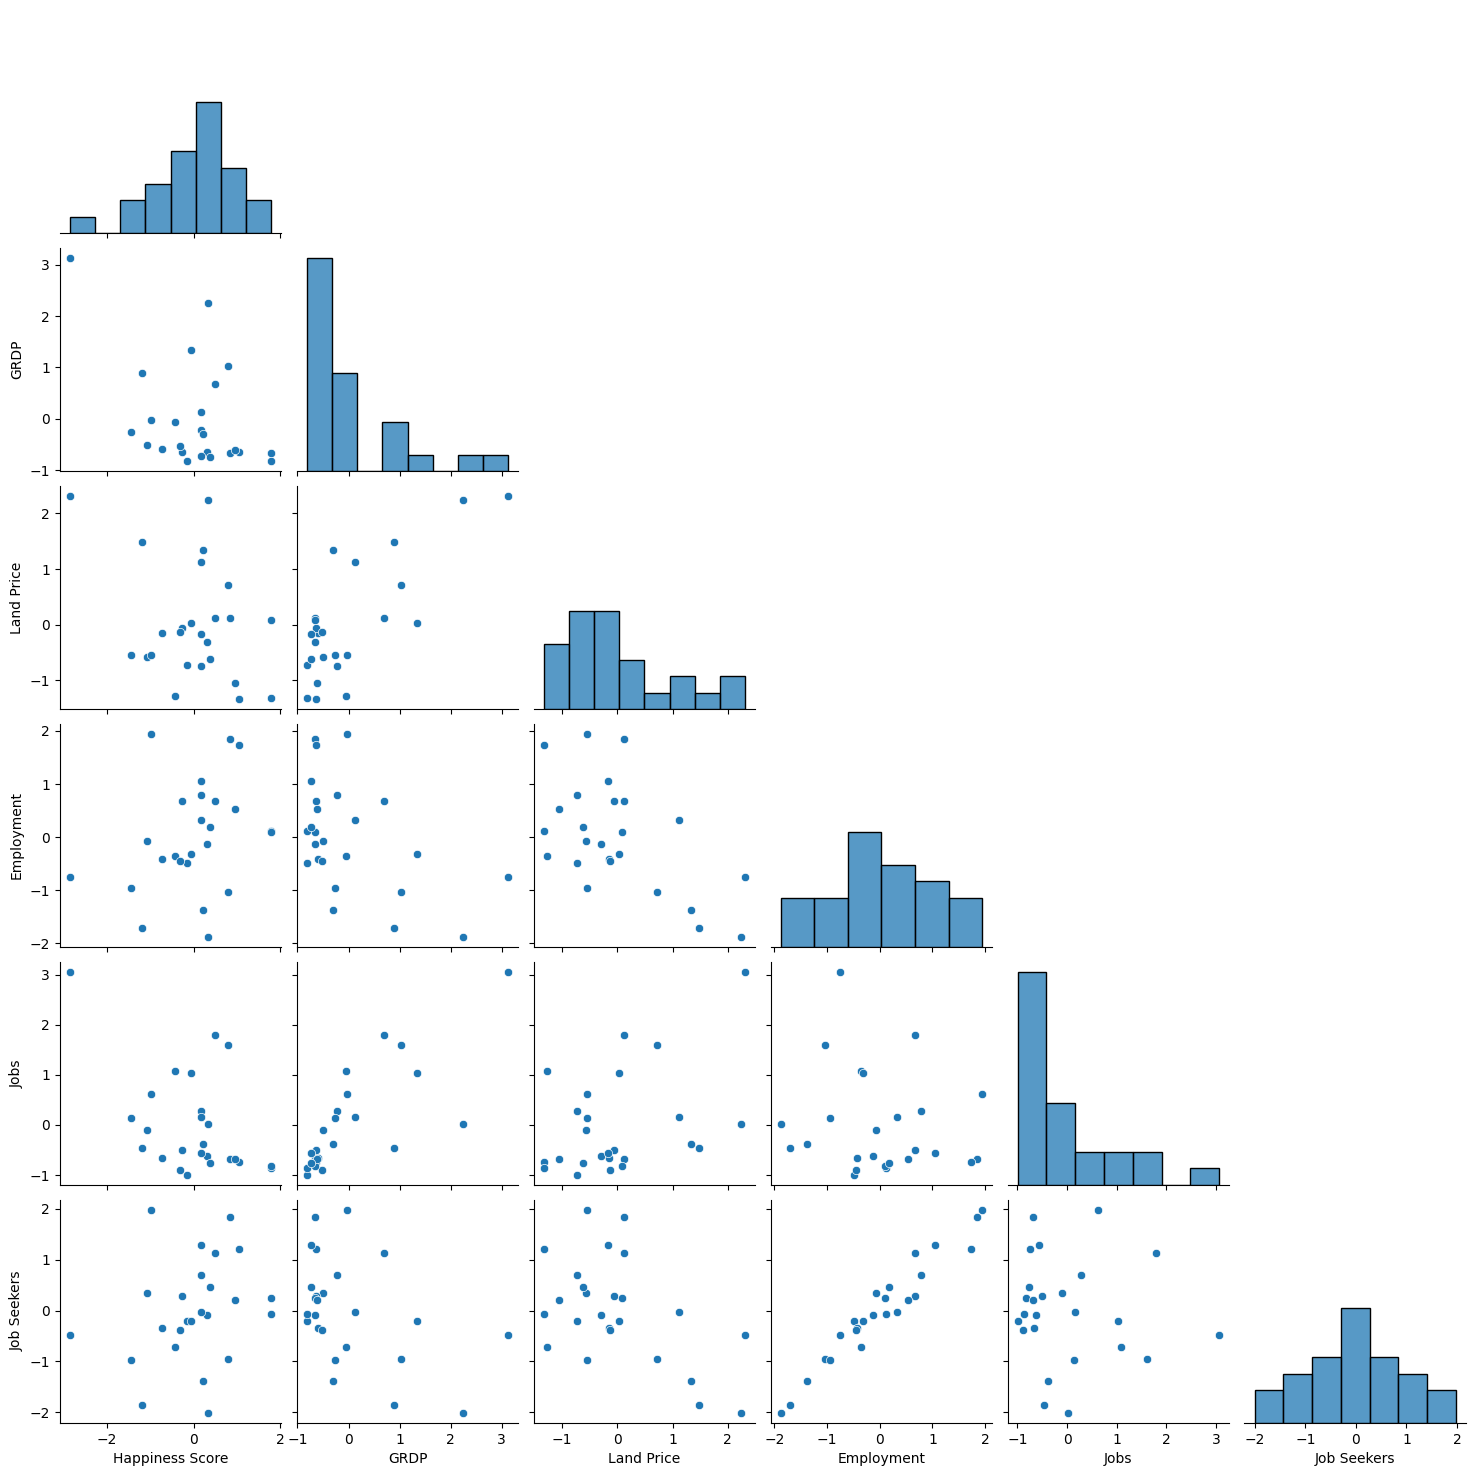

In [ ]:
sns.pairplot(data_factors[['Happiness Score', 'GRDP', 'Land Price', 'Employment', 'Jobs', 'Job Seekers']], corner=True)
plt.show()

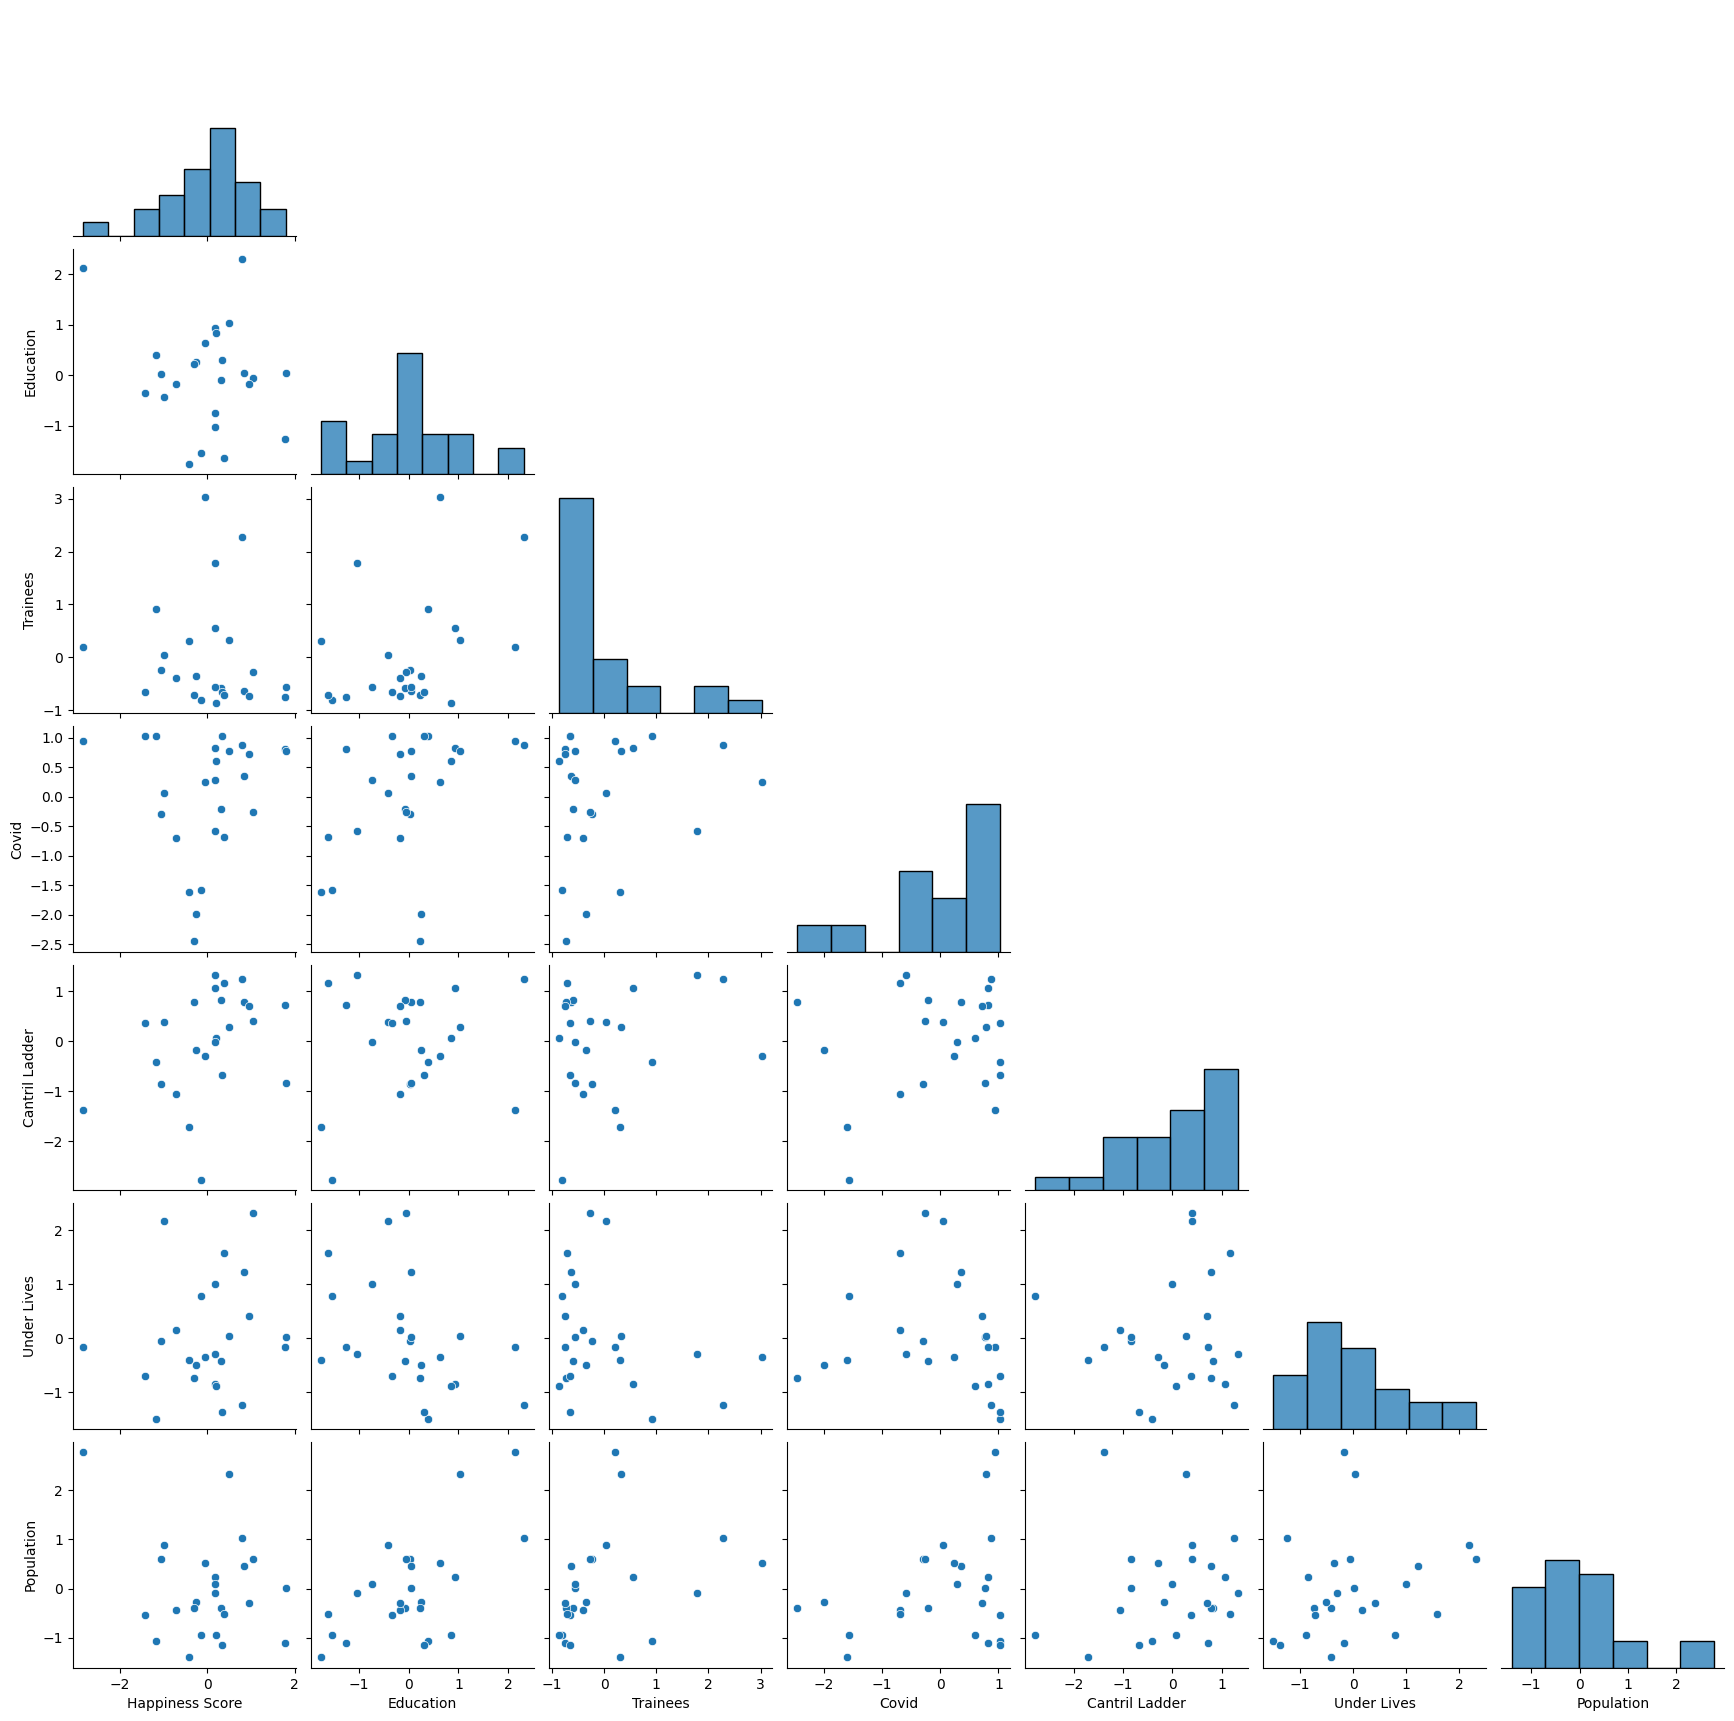

In [ ]:
sns.pairplot(data_factors[['Happiness Score', 'Education', 'Trainees', 'Covid', 'Cantril Ladder', 'Under Lives', 'Population']], corner=True)
plt.show()

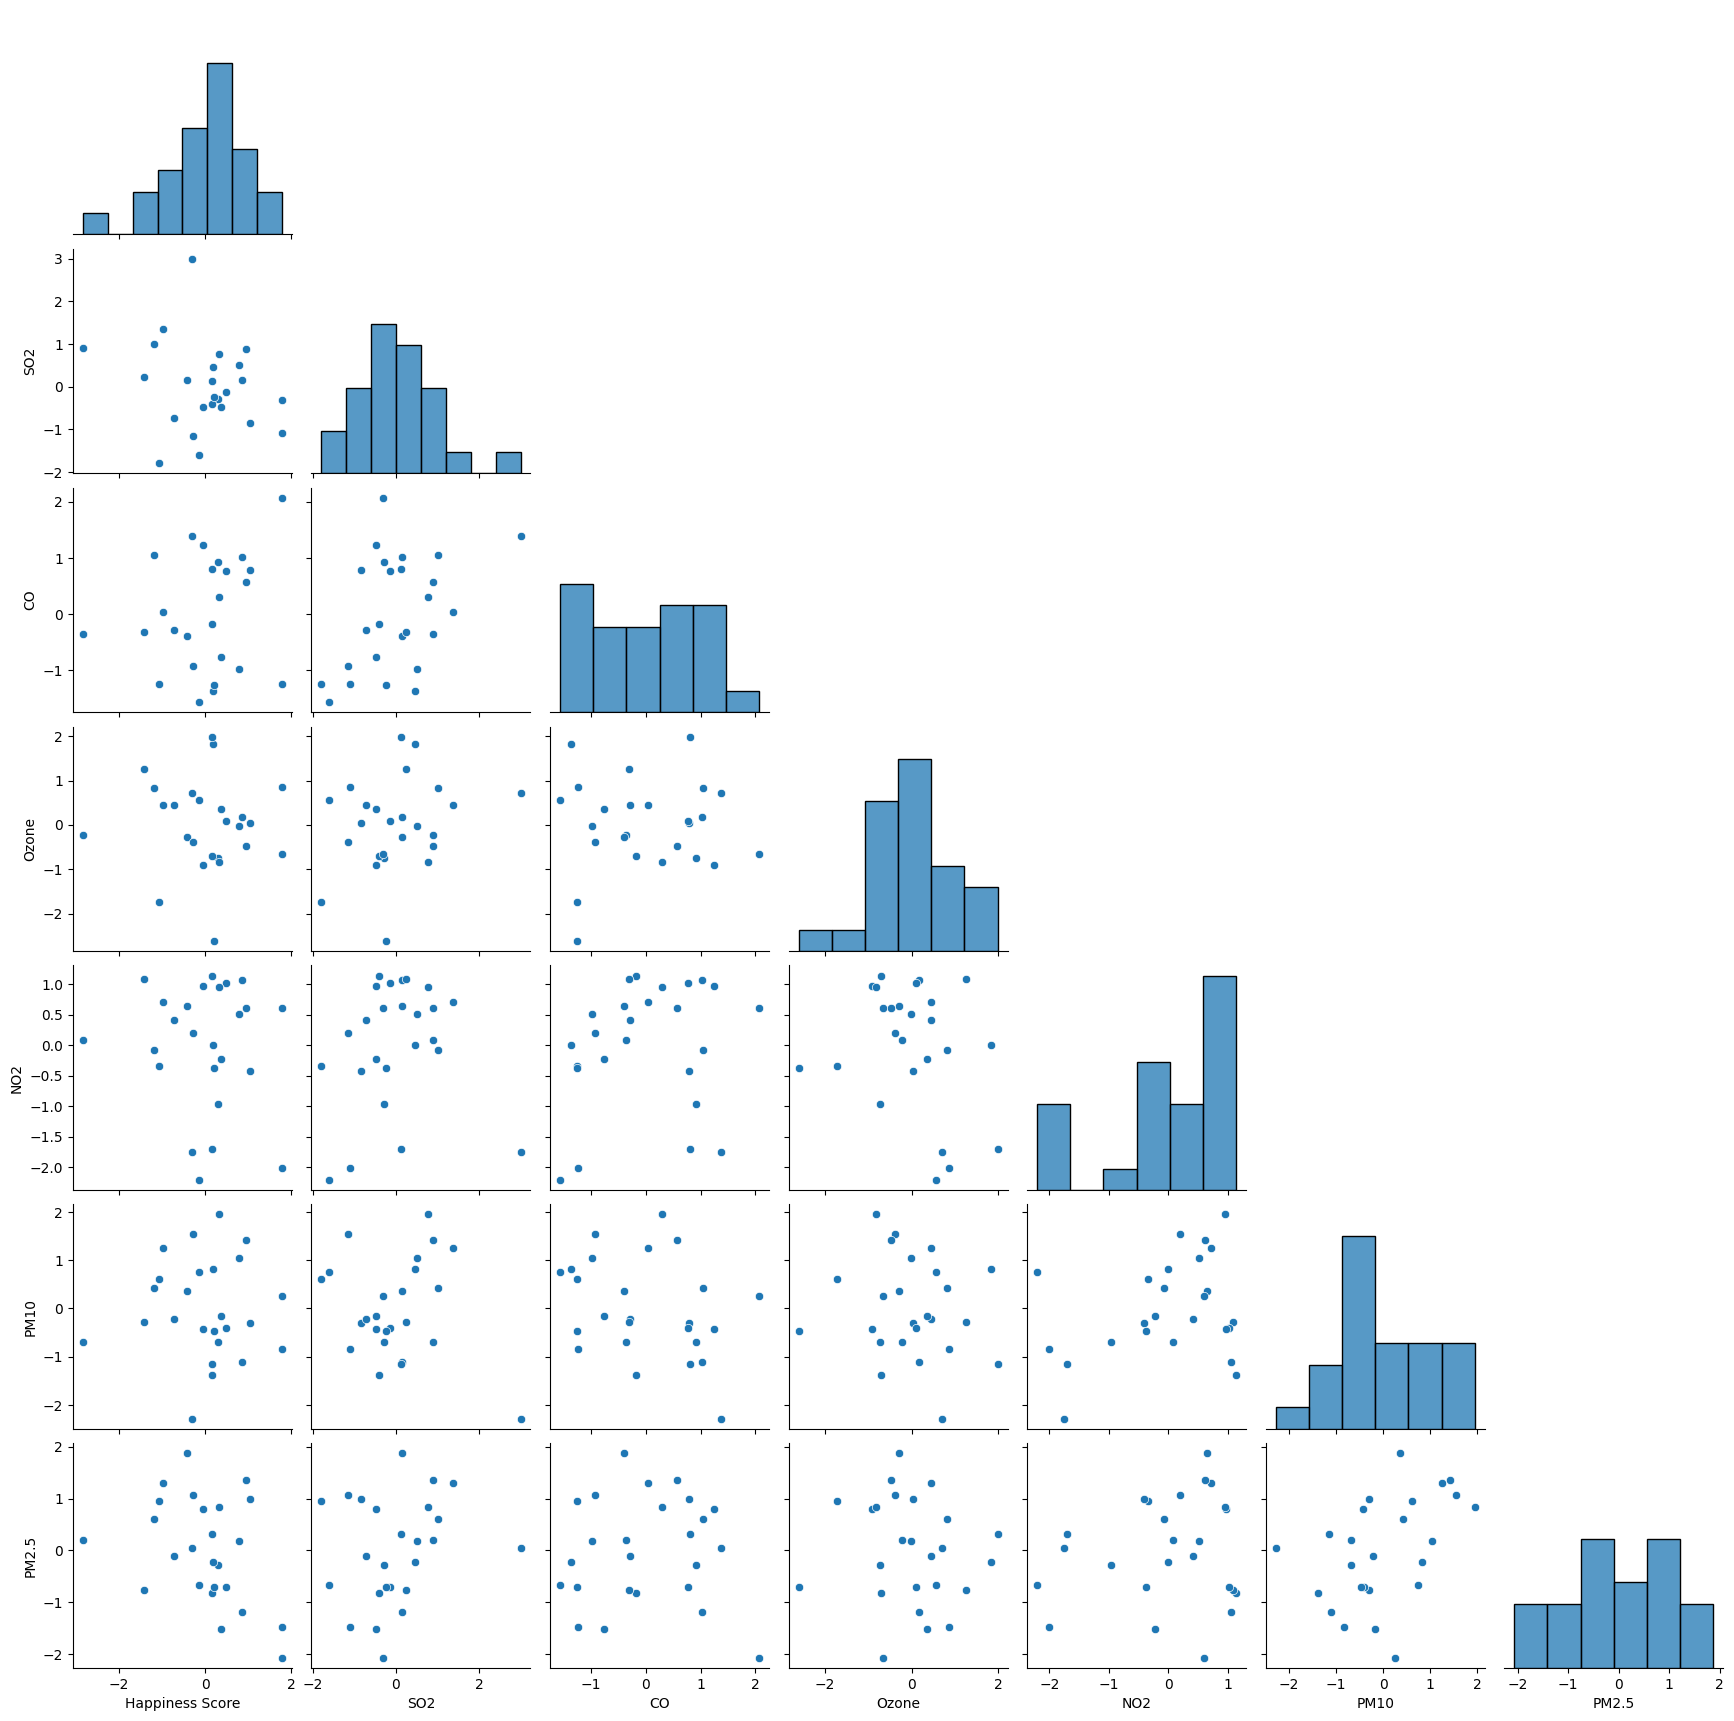

In [ ]:
sns.pairplot(data_factors[['Happiness Score','SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']], corner=True)
plt.show()

## Correlation Analysis

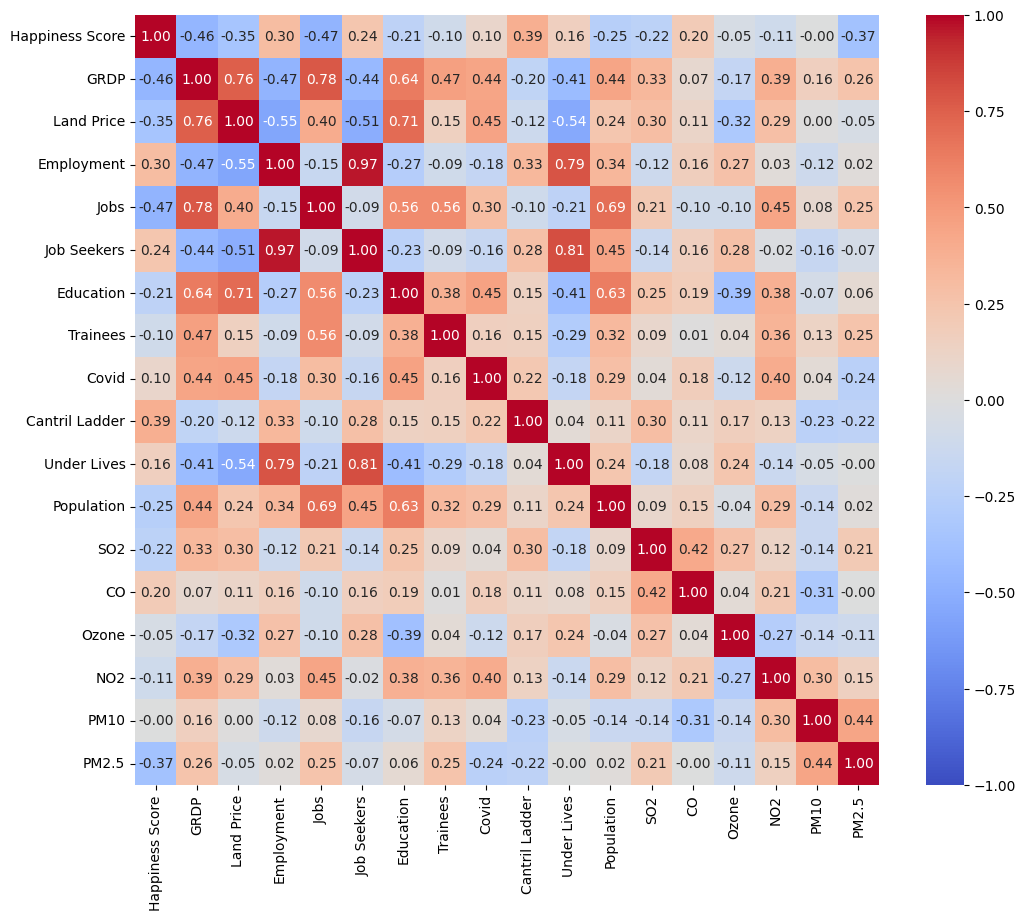

In [ ]:
correlation_matrix = data_factors.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation Matrix of Happiness and Factors')
plt.show()

##Regression Analysis

In [ ]:
print(df_2021.columns.tolist())

['Happiness Score', 'Gu', 'Gu_Code', 'GRDP', 'Land Price', 'Employment', 'Jobs', 'Job Seekers', 'Education', 'Trainees', 'Covid', 'Cantril Ladder', 'Under Lives', 'Population', 'SO2', 'CO', 'Ozone', 'NO2', 'PM10', 'PM2.5']


In [ ]:
import statsmodels.api as sm

In [ ]:
# Regression Analysis
X = data_factors.drop(columns=['Happiness Score'])
y = data_factors['Happiness Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     1.663
Date:                Tue, 17 Sep 2024   Prob (F-statistic):              0.253
Time:                        02:57:27   Log-Likelihood:                -15.260
No. Observations:                  25   AIC:                             66.52
Df Residuals:                       7   BIC:                             88.46
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.259e-16      0.168  -3.72e

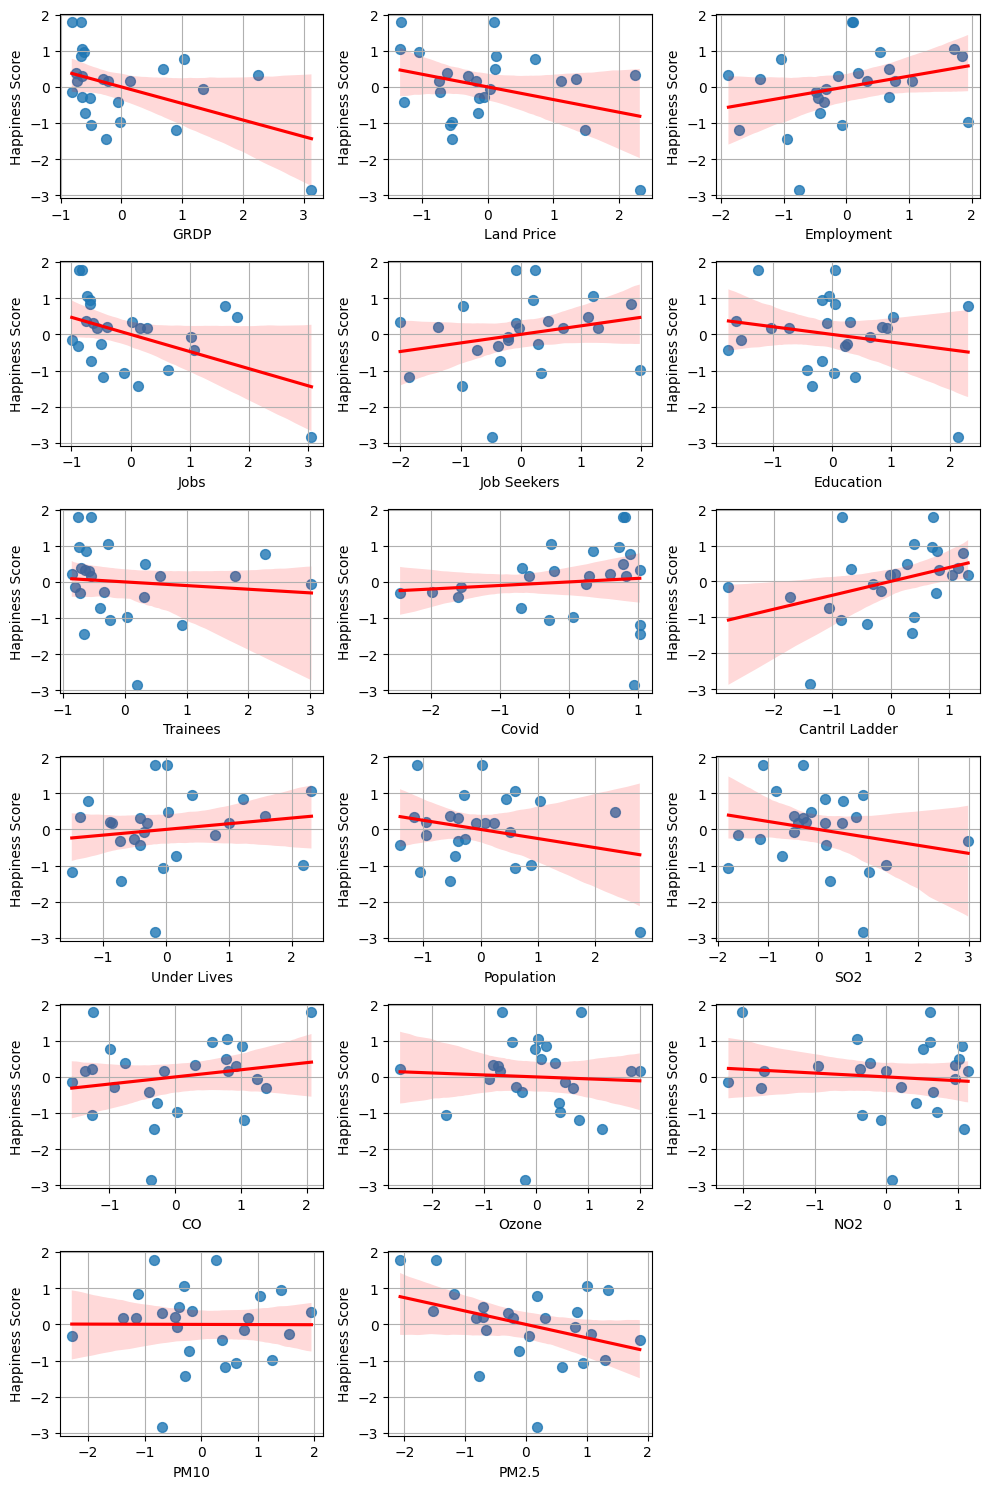

In [ ]:
ndependent_vars = X.columns[1:]  # Exclude the constant term
fig, axs = plt.subplots(6, 3, figsize=(10, 15))

for i, column in enumerate(independent_vars):
    # Plot happiness_score vs column
    sns.regplot(x=column, y='Happiness Score', data = data_factors, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_xlabel(column)
    axs[i // 3, i % 3].set_ylabel('Happiness Score')
    #axs[i // 3, i % 3].set_title(f'Relationship between Happiness Score and {column}')
    axs[i // 3, i % 3].grid(True)

axs[-1,-1].axis("off")
plt.tight_layout()

plt.show()